In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
import statistics
plt.style.use('seaborn')
df = pd.read_csv('kc_house_data.csv')
from statistics import mean
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
linreg = LinearRegression()

style.use('fivethirtyeight')

def best_fit_slope_and_intercept(xs,ys):
    m = ((mean(xs)*mean(ys)) - mean(xs*ys))/((mean(xs)*mean(xs))-mean(xs*xs))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/ squared_error_y_mean)
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [373]:
df.date = pd.to_datetime(df.date)
df.index = df.date


In [374]:
print(max(df.groupby(df.index.month).price.mean().tolist()))
print(min(df.groupby(df.index.month).price.mean().tolist()))
print(statistics.median(df.groupby(df.index.month).price.mean().tolist()))

562215.6150740242
508520.0513231756
538047.3298544026


In [367]:

def climranker(data):
    cdict = {}
    climlist = []
    for lat in data.lat.tolist():
        if lat < 47.3:
            cdict.update({lat:1})
        elif lat < 47.4:
            cdict.update({lat:2})
        elif lat < 47.45:
            cdict.update({lat:3})
        elif lat < 47.5:
            cdict.update({lat:4})
        elif lat < 47.6:
            cdict.update({lat:5})
        elif lat < 47.7:
            cdict.update({lat:6})
        else:
            cdict.update({lat:7})
    for c in data.lat.tolist():
        climlist.append(cdict[c])
    data['crank']= pd.Series(climlist)
    

        
    return data
df = climranker(df)
climrankdict={}
crlist=[]
for c in df.crank.tolist():
    climrankdict.update({c:crlist.append(df.groupby(df.crank==c).price.mean()[1])})
for c in df.crank.tolist():
    crlist.append(climrankdict[c])

df['climrank']= pd.Series(crlist)
df = df.drop(['crank'],axis=1)

KeyboardInterrupt: 

In [214]:

df.waterfront = df.waterfront.fillna(0)
df.grade = df.grade.fillna(df.grade.median())
df.bathrooms = df.bathrooms.fillna(0)
df.view = df.view.fillna(0)
df.floors  =df.floors.astype(int)
df.bathrooms  =df.bathrooms.astype(int)



In [215]:

df['renovated'] = df.yr_renovated.where(df.yr_renovated <= 0, other = 1)
df['renovated'] = (df.renovated > 0).astype('category')
df.drop(labels = 'yr_renovated', axis = 1, inplace = True)

In [216]:

df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

min max scaling used on the price to make my algorithms compuationally more efficent.  I removed the null values in the columns and replaced them with the median.

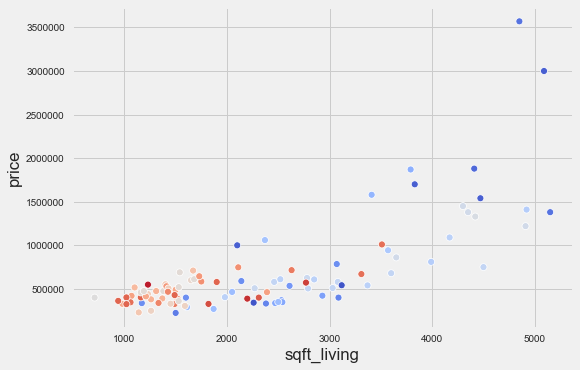

In [359]:
cmap = palette=sns.color_palette('coolwarm', n_colors=43)
sns.scatterplot(x='sqft_living',y='price', hue='zipcode', palette=cmap,data=df.tail(100), legend=False)

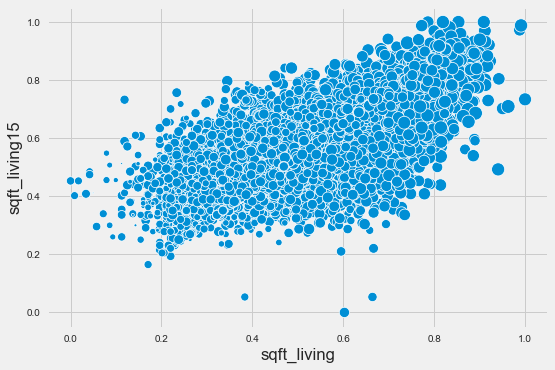

In [123]:

cmap = sns.cubehelix_palette(dark=0, light=.1, as_cmap=True)
sns.scatterplot(x='sqft_living',y='sqft_living15', size='price',sizes=(1,200), palette=cmap,data=df, legend=False)

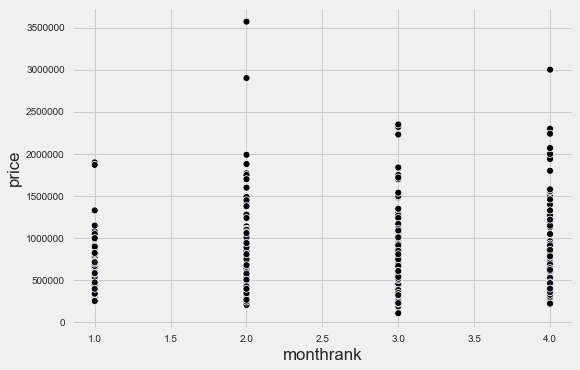

In [347]:
cmap = sns.cubehelix_palette(dark=0, light=.1, as_cmap=True, reverse=True)
sns.scatterplot(x='monthrank',y='price', hue='zipcode', palette=cmap,data=df.tail(1000), legend=False)

In [218]:
low = statistics.median(df.groupby('zipcode').price.mean().tolist()) - min(df.groupby('zipcode').price.mean().tolist())
lmid = statistics.median(df.groupby('zipcode').price.mean().tolist())
hmid = statistics.median(df.groupby('zipcode').price.mean().tolist()) + min(df.groupby('zipcode').price.mean().tolist())
high = statistics.median(df.groupby('zipcode').price.mean().tolist()) + 2*min(df.groupby('zipcode').price.mean().tolist())+120000
hhigh = statistics.median(df.groupby('zipcode').price.mean().tolist()) + 3*min(df.groupby('zipcode').price.mean().tolist())
most = max(df.groupby('zipcode').price.mean().tolist()) - statistics.median(df.groupby('zipcode').price.mean().tolist())
def zipranker(data):
    ndict = {}
    ziplist = []
    for code in data.zipcode.tolist():
        if df.groupby(data.zipcode==code).price.mean().tolist()[1] < low:
            ndict.update({code:1})
        elif df.groupby(data.zipcode==code).price.mean().tolist()[1] < lmid:
            ndict.update({code:2})
        elif df.groupby(data.zipcode==code).price.mean().tolist()[1] < hmid:
            ndict.update({code:3})
        elif df.groupby(data.zipcode==code).price.mean().tolist()[1] < high:
            ndict.update({code:4})
        elif df.groupby(data.zipcode==code).price.mean().tolist()[1] < hhigh:
            ndict.update({code:5})
        else:
            ndict.update({code:6})
    for zc in data.zipcode.tolist():
        ziplist.append(ndict[zc])
    data['nrank']= pd.Series(ziplist)

        
    return data
df = zipranker(df)

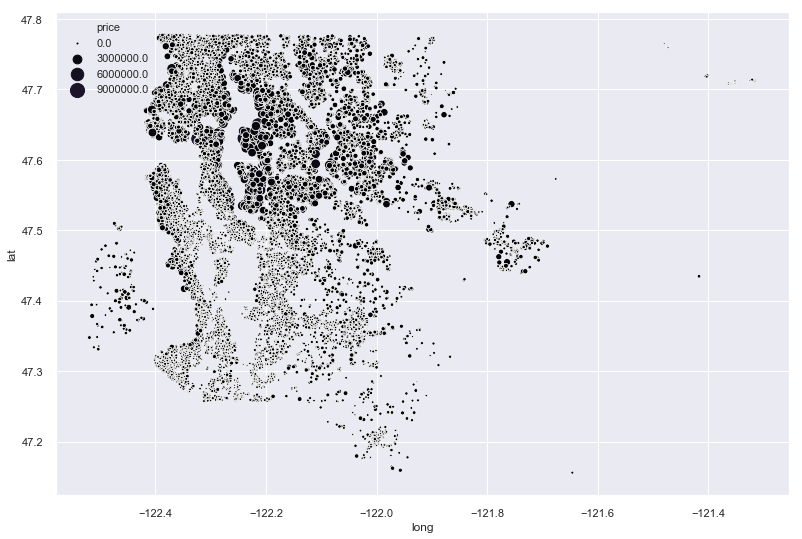

In [14]:

cmap = sns.cubehelix_palette(dark=0, light=.1, as_cmap=True, reverse=True)

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(x='long',y='lat', hue='price', size='price',sizes=(1, 200), palette=cmap,data=df)

Let's look at boxplots of some features that are important and see if it's reasonable to remove some outliars

/Users/robertfustero/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


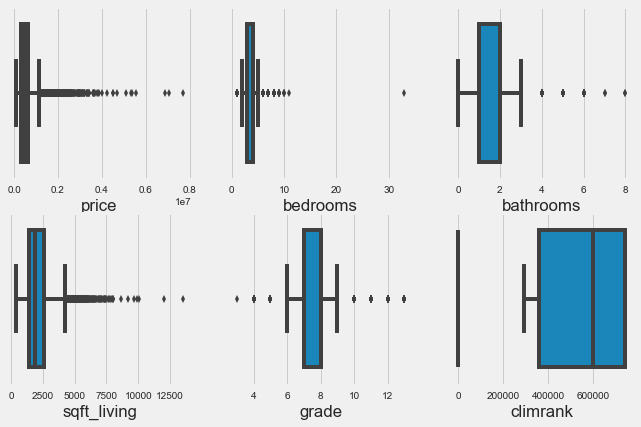

In [182]:
plt.figure(figsize=(10,10))
plt.subplot(331)
sns.boxplot(df['price'])
plt.subplot(332)
sns.boxplot(df['bedrooms'])
plt.subplot(333)
sns.boxplot(df['bathrooms'])
plt.subplot(334)
sns.boxplot(df['sqft_living'])
plt.subplot(335)
sns.boxplot(df['grade'])
plt.subplot(336)
sns.boxplot(df['nrank'])
plt.subplot(336)
sns.boxplot(df['climrank'])

In [369]:
print("Number of rows before:" , len(df))
df = df[df.price < 3000000]
df = df[df.bedrooms < 7]
df = df[df.bathrooms < 6]
df = df[df.sqft_living < 10000]
df = df[df.sqft_lot < 1000000]
print("Number of rows after:" ,len(df))

Number of rows before: 21597
Number of rows after: 21477


In [184]:
def cross_validation(X,y,cv=15,show_scores=False):
    score = cross_val_score(linreg,X, y,cv=cv,scoring='r2')
    print('Model Accuracy:',round(sum(score)/len(score)*100),'%')
    #return round(sum(score)/len(score)*100)

def feature_selection(X,y):
    est=sm.OLS(y,X).fit()
    pvalues = pd.DataFrame(est.pvalues,columns=['p'])
    features = list(pvalues[pvalues.p<.05].index)
    print(features)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17388 entries, 0 to 21596
Data columns (total 24 columns):
id               17388 non-null int64
date             17388 non-null datetime64[ns]
price            17388 non-null float64
bedrooms         17388 non-null int64
bathrooms        17388 non-null int64
sqft_living      17388 non-null int64
sqft_lot         17388 non-null int64
floors           17388 non-null int64
waterfront       17388 non-null float64
view             17388 non-null float64
condition        17388 non-null int64
grade            17388 non-null int64
sqft_above       17388 non-null int64
sqft_basement    17388 non-null float64
yr_built         17388 non-null int64
zipcode          17388 non-null int64
lat              17388 non-null float64
long             17388 non-null float64
sqft_living15    17388 non-null int64
sqft_lot15       17388 non-null int64
crank            17388 non-null int64
climrank         17388 non-null float64
renovated        17388 non-null 

In [370]:
# create a Python list of feature names
feature_cols = [ 'bedrooms','bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat','long',
       'sqft_living15', 'sqft_lot15', 'renovated','climrank',
       'nrank']

# use the list to select a subset of theaz original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df.price

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(cross_validation(X,y))

KeyError: "['renovated' 'climrank' 'nrank'] not in index"

In [242]:
df.index = df.date

In [245]:
df.groupby(by=[df.index.month]).price.mean()

date
1     0.471566
2     0.469539
3     0.487493
4     0.499201
5     0.488820
6     0.493412
7     0.488528
8     0.484296
9     0.482232
10    0.482411
11    0.474778
12    0.475883
Name: price, dtype: float64

/Users/robertfustero/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


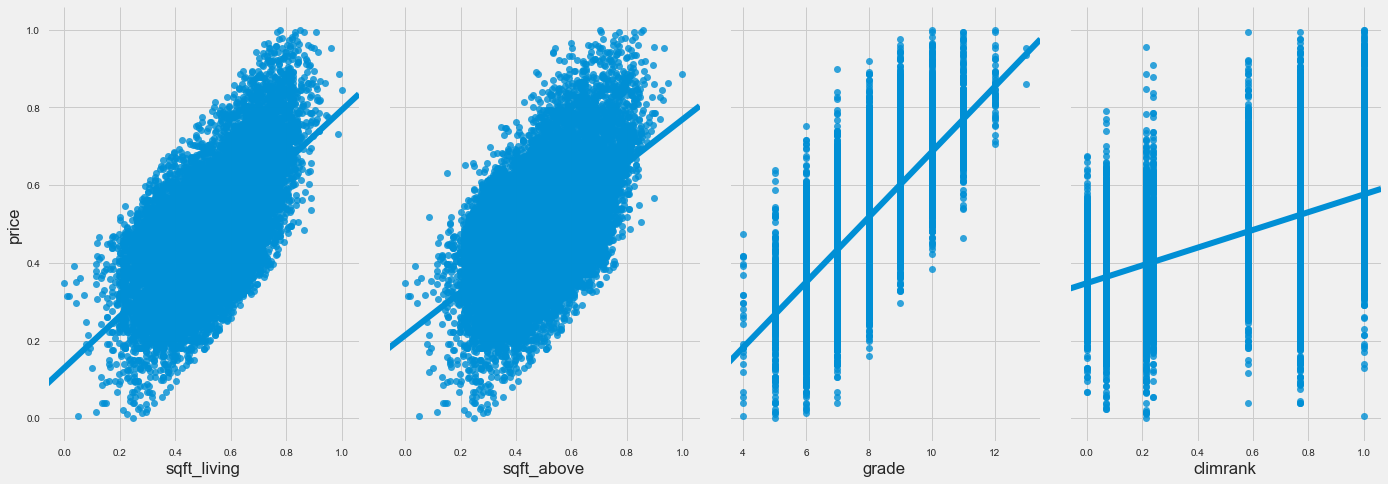

In [235]:
sns.pairplot(df, x_vars=['sqft_living','sqft_above','grade','climrank'], y_vars='price', size=7, aspect=0.7, kind='reg')

In [236]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
nrank            0
climrank         0
dtype: int64

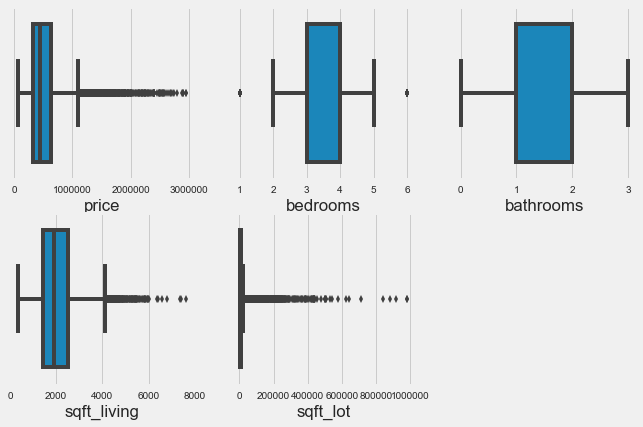

In [108]:
plt.figure(figsize=(10,10))
plt.subplot(331)
sns.boxplot(df['price'])
plt.subplot(332)
sns.boxplot(df['bedrooms'])
plt.subplot(333)
sns.boxplot(df['bathrooms'])
plt.subplot(334)
sns.boxplot(df['sqft_living'])
plt.subplot(335)
sns.boxplot(df['sqft_lot'])

In [ ]:

bins = [ -1 , 1 , df.sqft_basement.max() ]
labels = ['0','1']

df.sqft_basement = pd.cut(df.sqft_basement, bins, labels=labels)
df.sqft_basement = df.sqft_basement.astype('category')
sqft_basement = pd.get_dummies(df.sqft_basement, prefix='basement', drop_first=True)
df = df.join([sqft_basement])
df.drop(['sqft_basement'], axis=1, inplace=True)

In [ ]:
bins = [ -1 , 1 , df.yr_renovated.max() ]
labels = ['0','1']

df.yr_renovated = pd.cut(df.yr_renovated, bins, labels=labels)
df.yr_renovated = df.yr_renovated.astype('category')
yr_renovated = pd.get_dummies(df.yr_renovated, prefix='renovated', drop_first=True)
df = df.join([yr_renovated])
df.drop(['yr_renovated'], axis=1, inplace=True)

In [227]:

df.waterfront = df.waterfront.astype('category')
#df.view = df.view.astype('category')
#df.condition = df.condition.astype('category')
df.zipcode = df.zipcode.astype('category')
#df.bedrooms = df.bedrooms.astype('category')
#df.bathrooms = df.bathrooms.astype('category')
#df.floors = df.floors.astype('category')
#df.yr_built  =df.yr_built.astype('category')


df.waterfront = pd.get_dummies(df.waterfront, prefix='waterfront',drop_first=True)
#df.view = pd.get_dummies(df.view, prefix='view',drop_first=True)
#df.condition = pd.get_dummies(df.condition, prefix='condition',drop_first=True)
df.zipcode = pd.get_dummies(df.zipcode, prefix='zipcode',drop_first=True)
#df.bedrooms = pd.get_dummies(df.bedrooms, prefix='bedrooms',drop_first=True)
#df.bathrooms = pd.get_dummies(df.bathrooms, prefix='bathrooms',drop_first=True)
#df.floors = pd.get_dummies(df.floors, prefix='floors',drop_first=True)
#df.yr_built = pd.get_dummies(df.yr_built, prefix='yr_built',drop_first=True)

df = df.join([waterfront, zipcode,how='inner')
df.drop(['waterfront','zipcode'],axis=1,inplace=True)

/Users/robertfustero/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


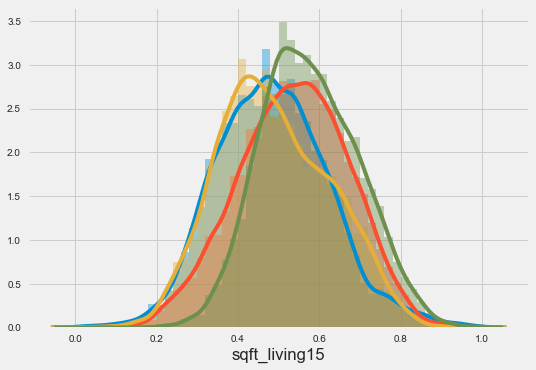

In [225]:
df['price'] = np.log(df.price)
df['sqft_living'] = np.log(df.sqft_living)
df['sqft_living15'] = np.log(df.sqft_living15)
df['sqft_above'] = np.log(df.sqft_above)
df['climrank'] = np.log(df.climrank)
df.price = (df['price']-min(df['price']))/(max(df['price'])-min(df['price']))
df.sqft_living = (df['sqft_living']-min(df['sqft_living']))/(max(df['sqft_living'])-min(df['sqft_living']))
df.sqft_above = (df['sqft_above']-min(df['sqft_above']))/(max(df['sqft_above'])-min(df['sqft_above']))
df.sqft_living15 = (df['sqft_living15']-min(df['sqft_living15']))/(max(df['sqft_living15'])-min(df['sqft_living15']))
df.climrank = (df['climrank']-min(df['climrank']))/(max(df['climrank'])-min(df['climrank']))
sns.distplot(df.price,label="price")
sns.distplot(df.sqft_living,label="price")
sns.distplot(df.sqft_above,label="price")
sns.distplot(df.sqft_living15,label="price")
plt.show()

In [150]:
df['climrank'] = np.log(df.climrank)
df.climrank = (df['climrank']-min(df['climrank']))/(max(df['climrank'])-min(df['climrank']))


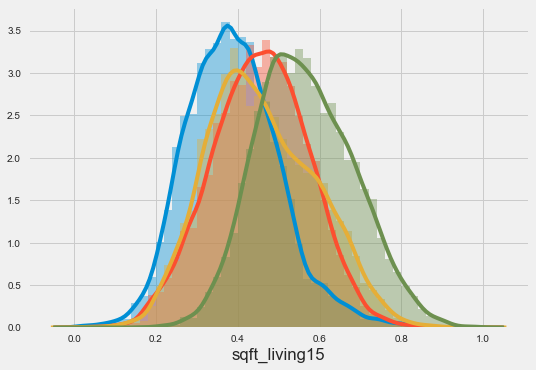

In [152]:

sns.distplot(df.price,label="price")
sns.distplot(df.sqft_living,label="price")
sns.distplot(df.sqft_above,label="price")
sns.distplot(df.sqft_living15,label="price")

plt.show()

/Users/robertfustero/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


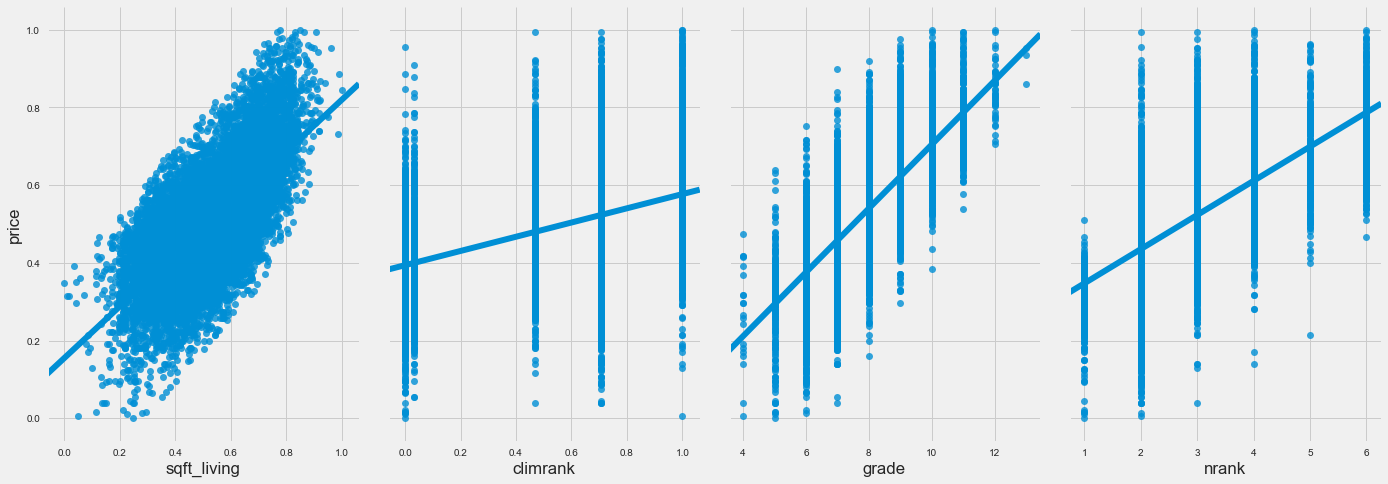

In [189]:
sns.pairplot(df, x_vars=['sqft_living','climrank','grade','nrank'], y_vars='price', size=7, aspect=0.7, kind='reg')

In [115]:
print(cross_validation(X,y))

Model Accuracy: 82.0 %
None


In [192]:
feature_selection(X,y)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [85]:
len(feature_cols)

16

In [167]:
# create a Python list of feature names
feature_cols = ['sqft_living','sqft_above','nrank','grade','yr_built','crank','view','bathrooms']

# use the list to select a subset of theaz original DataFrame
X = df[feature_cols]

# select a Series from the DataFrame
y = df.price

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(cross_validation(X,y))

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

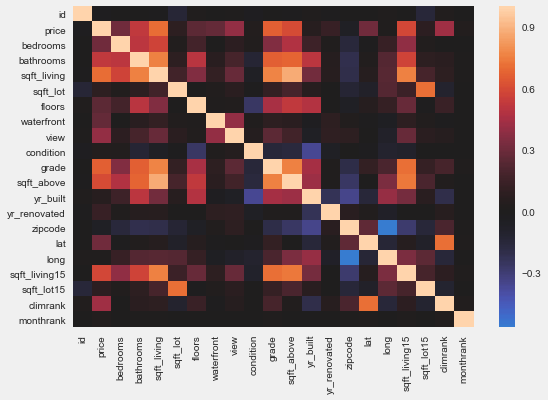

In [346]:
sns.heatmap(df.corr(), center=0);

This is a correlation heat map where the brighter the color, the higher the two values correspond with eachother.

The most obvious ascept that would influence a houses's price is its size.  Let's take a look at that relationship.

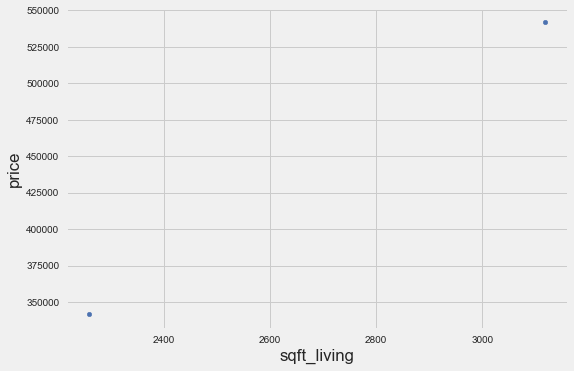

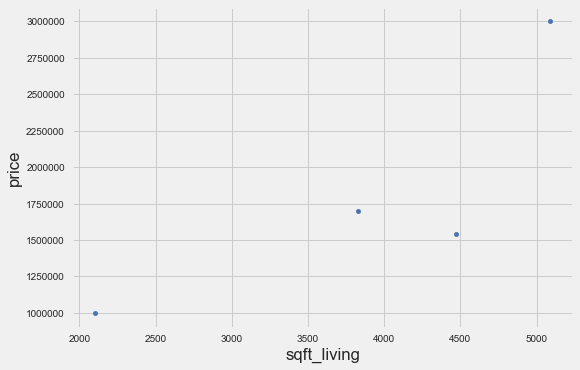

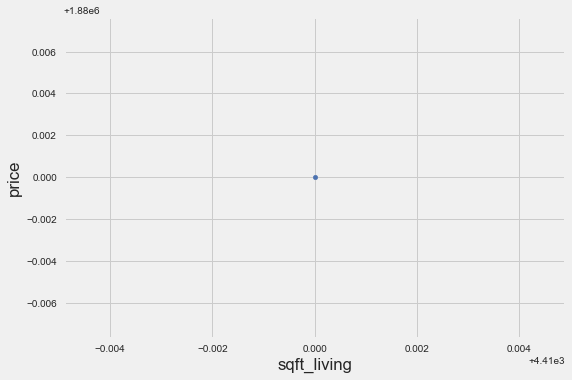

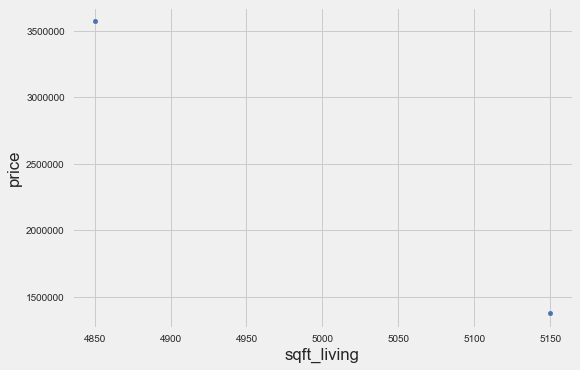

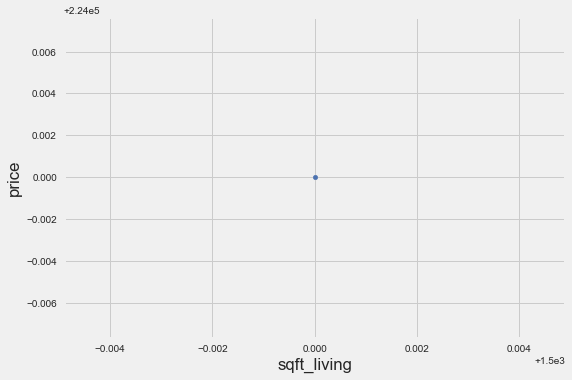

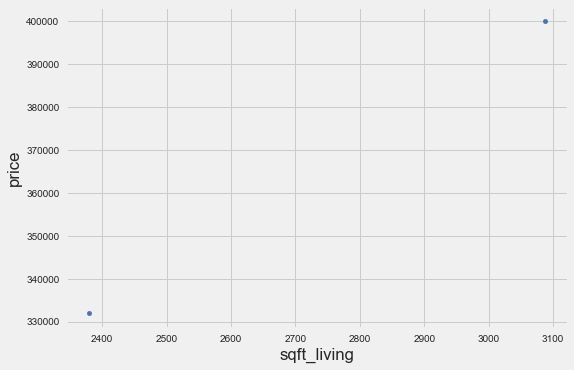

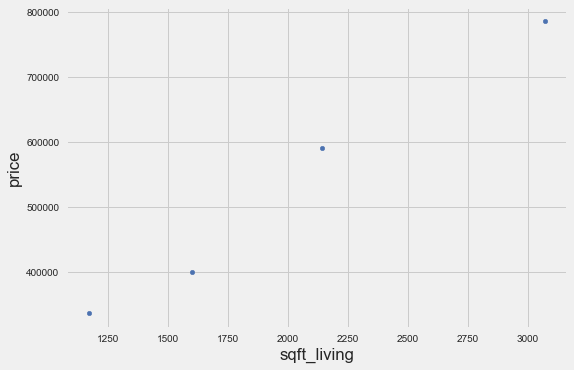

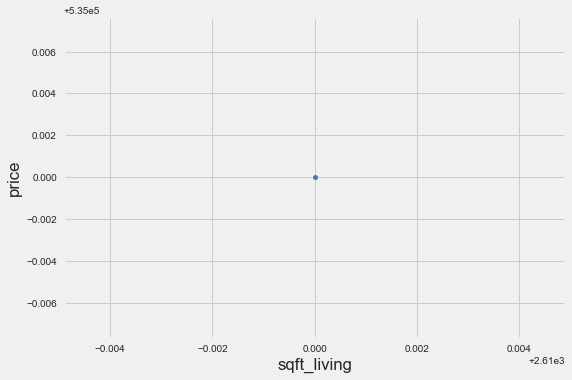

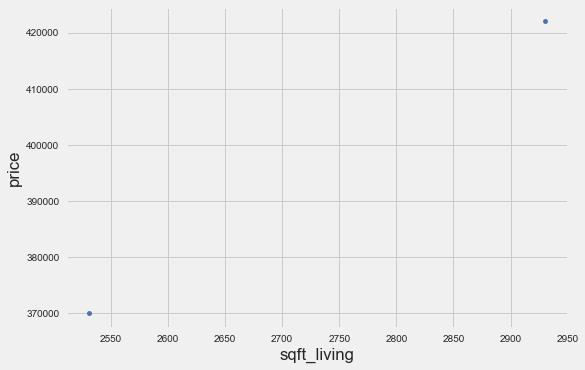

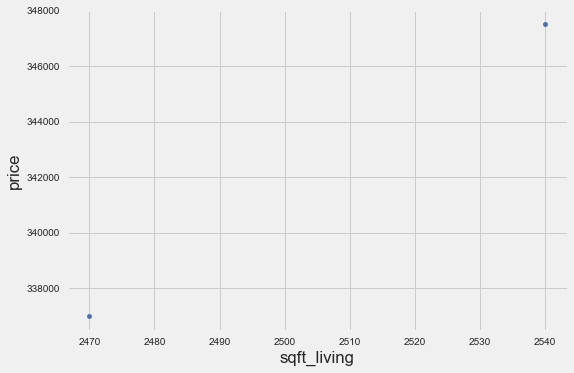

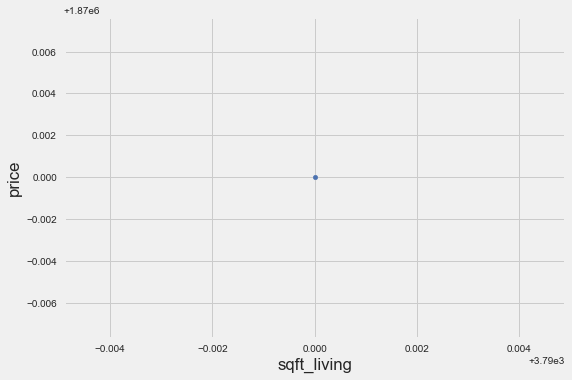

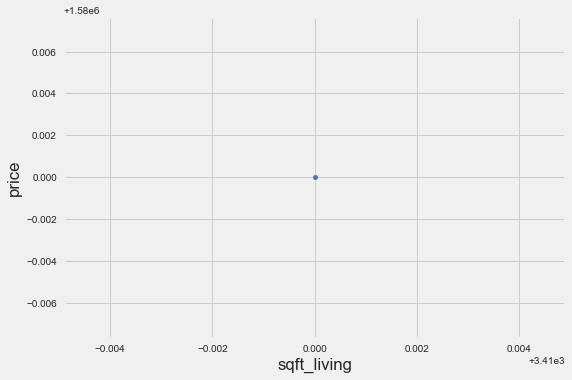

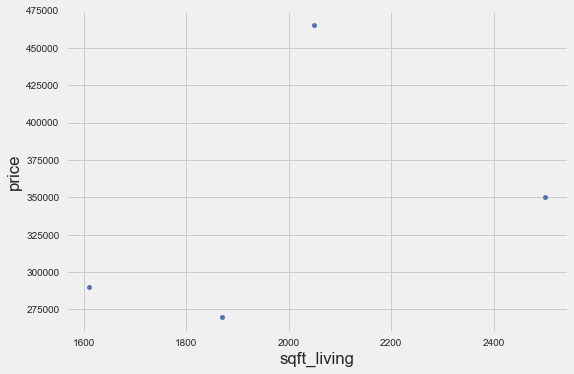

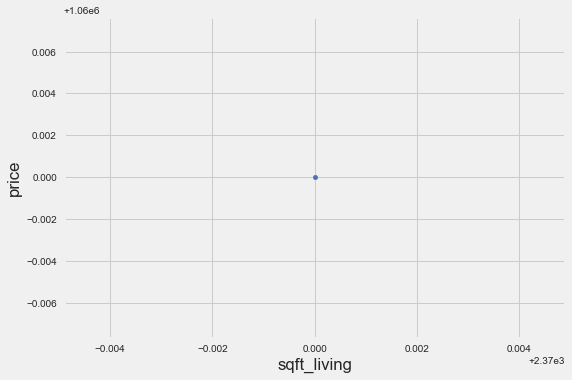

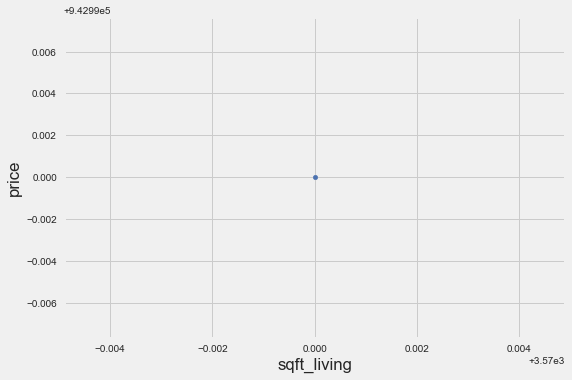

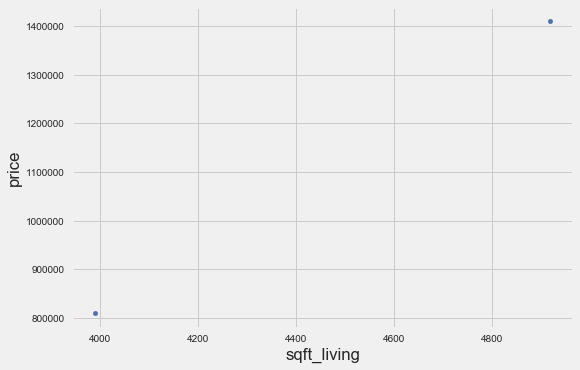

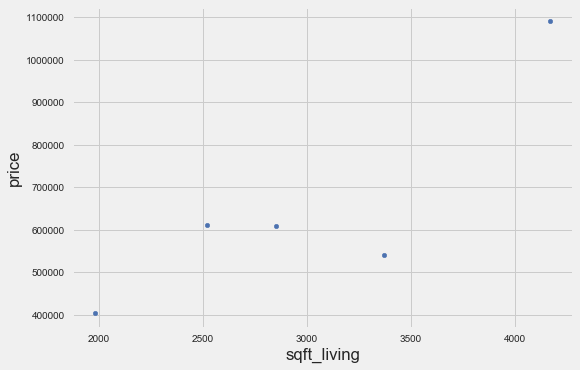

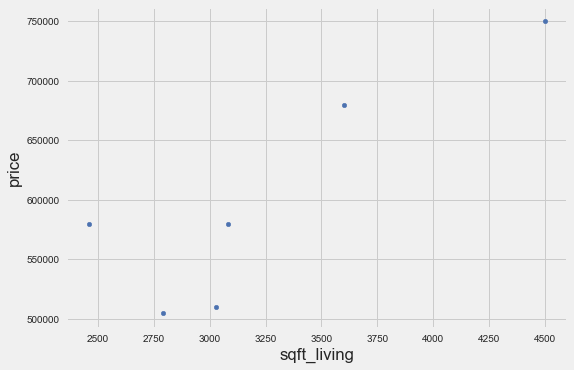

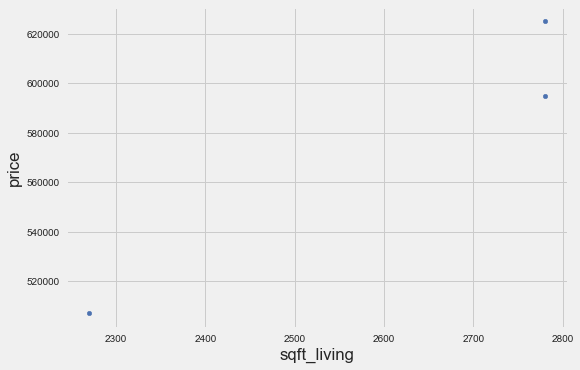

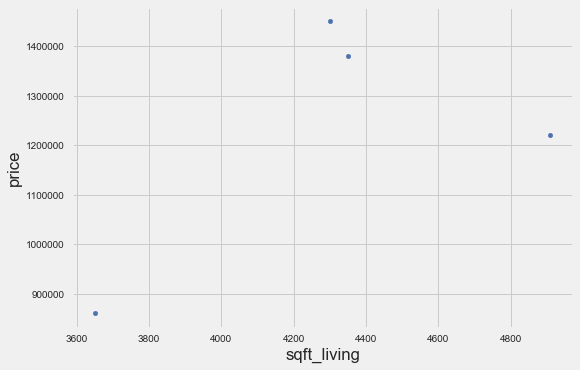

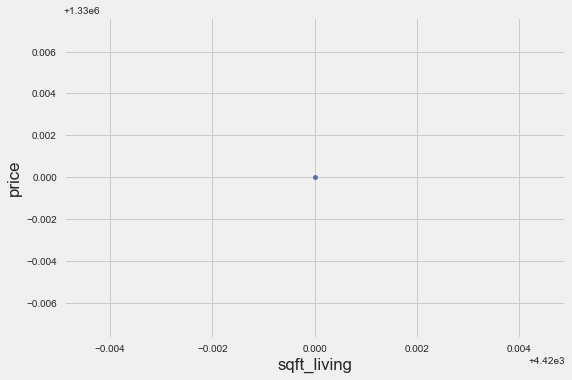

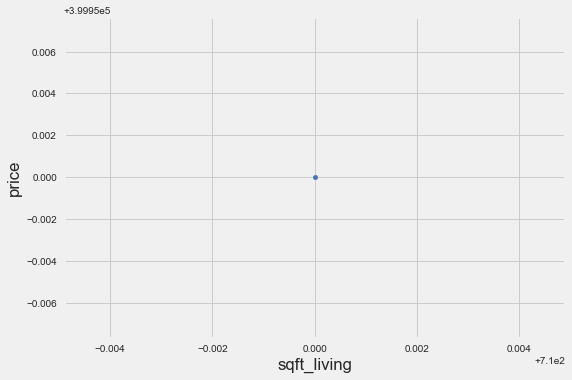

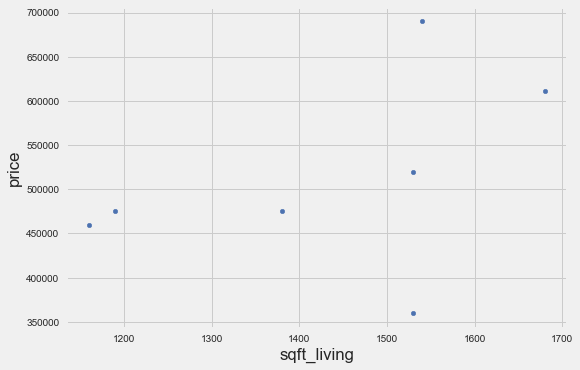

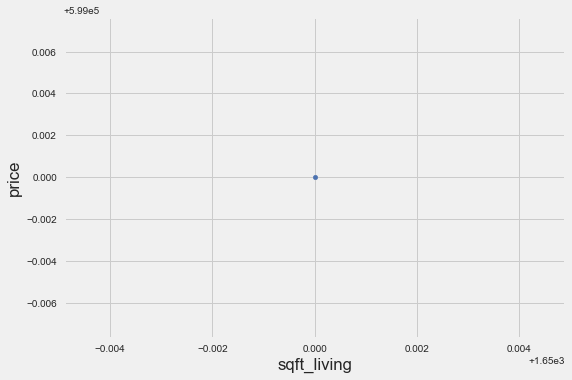

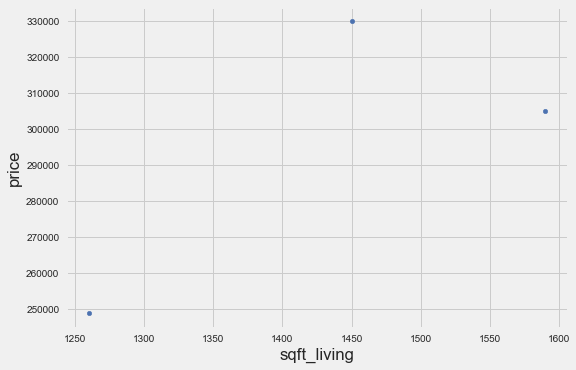

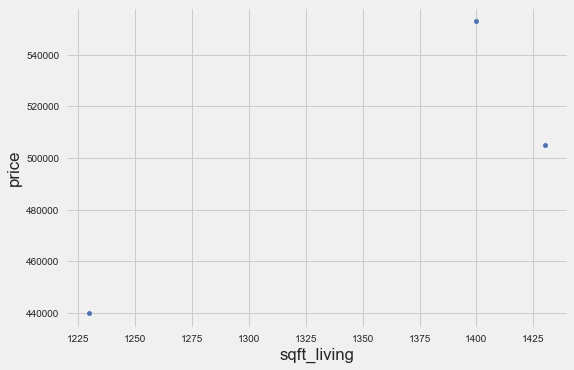

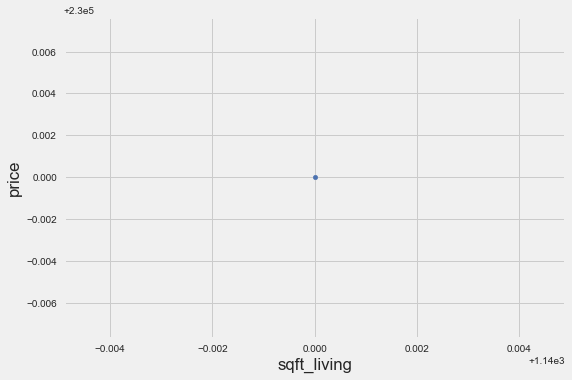

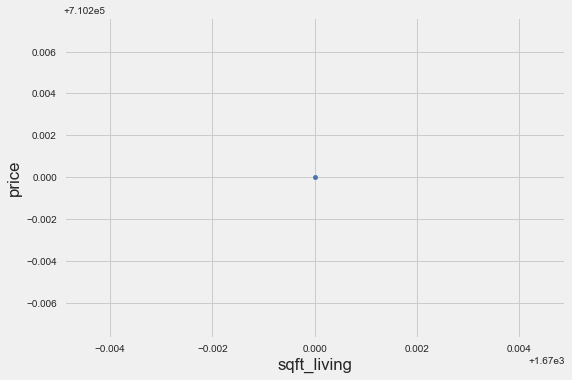

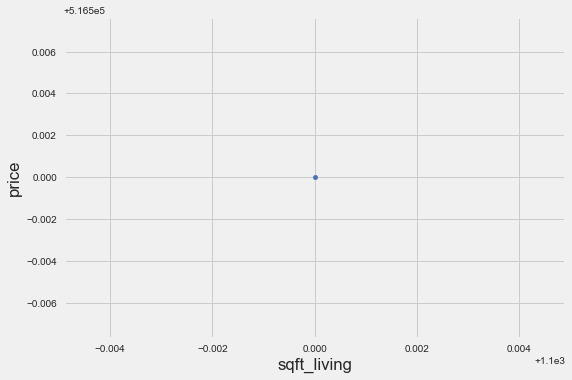

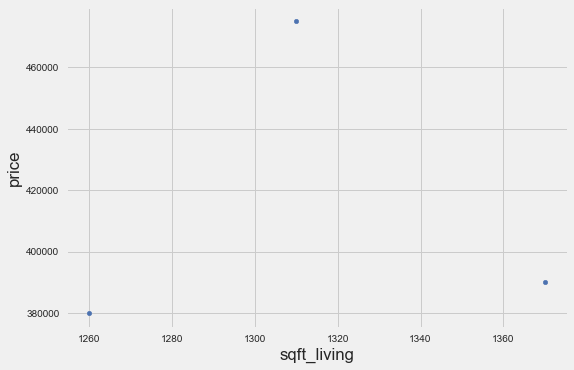

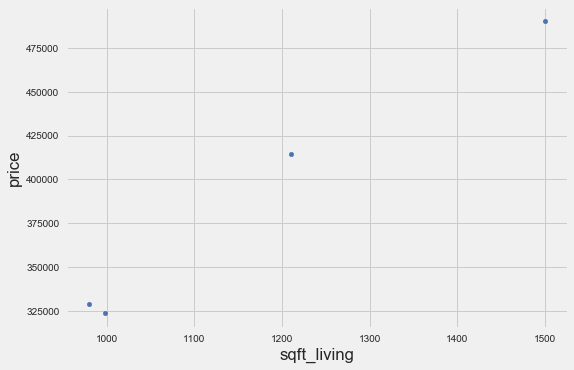

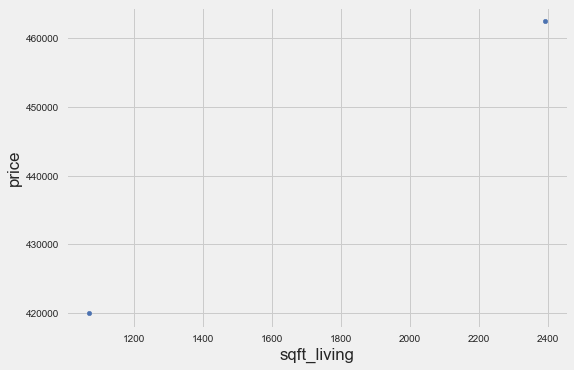

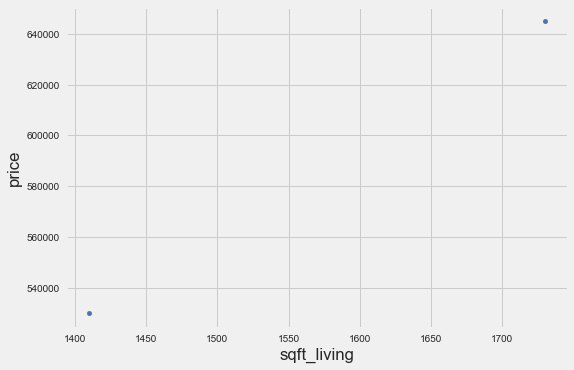

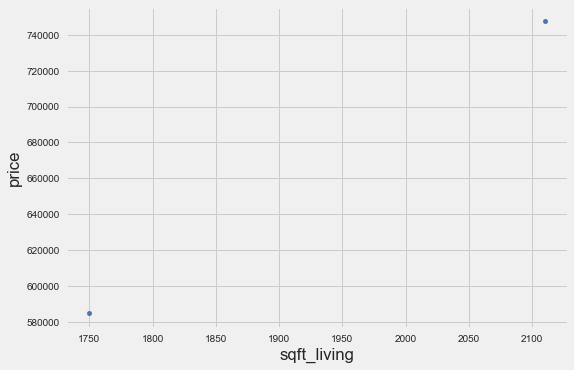

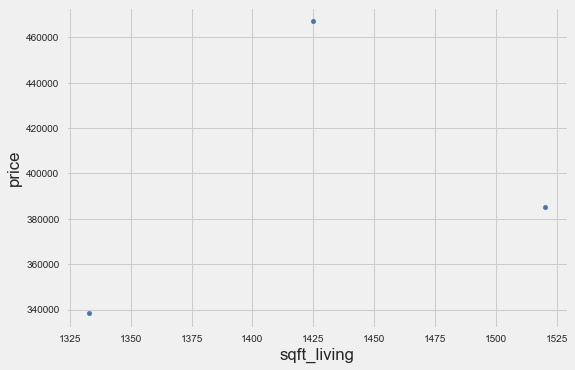

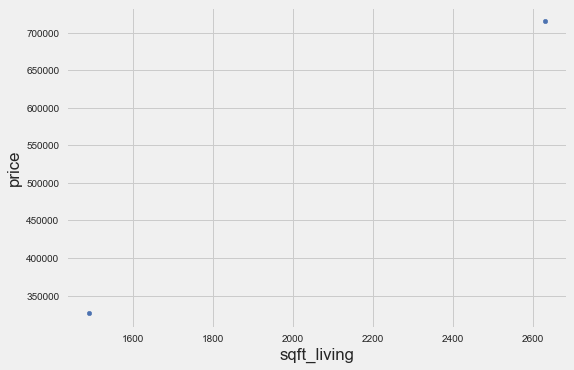

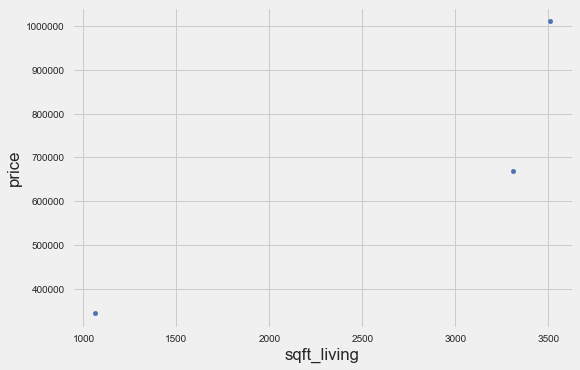

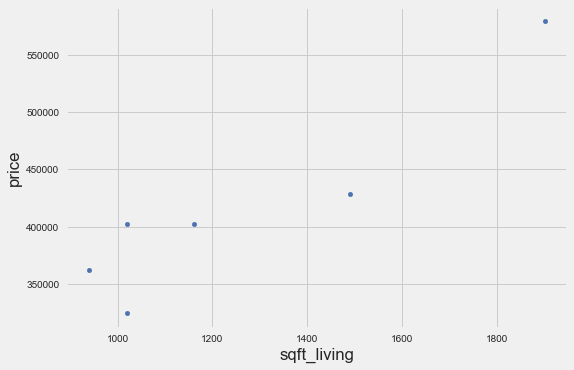

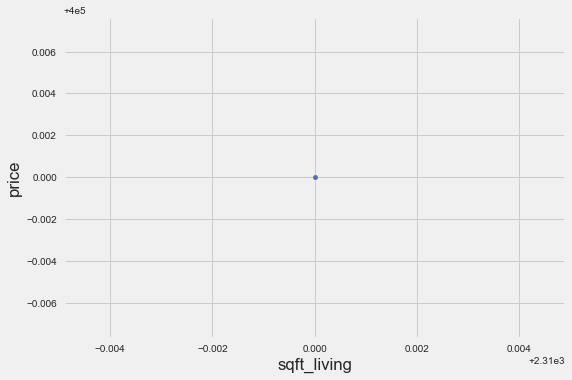

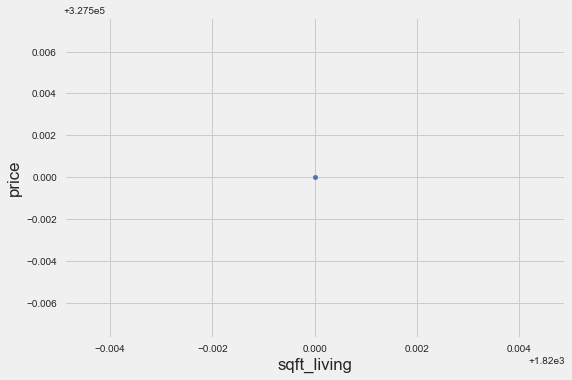

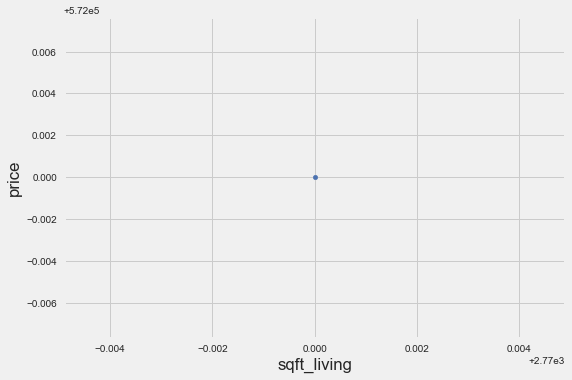

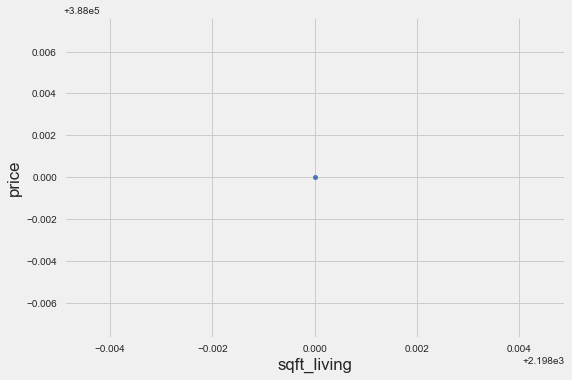

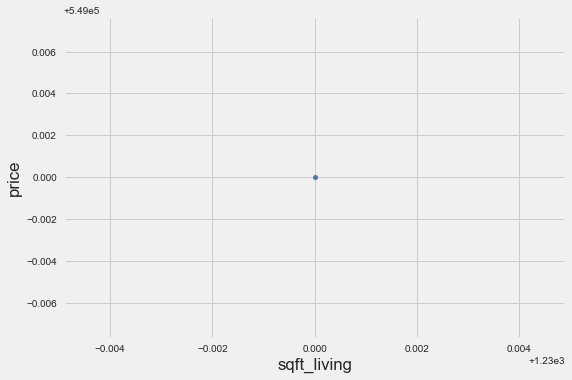

In [364]:

df.tail(100).groupby('zipcode').plot(x ='sqft_living', y='price', kind = 'scatter',stacked=True)
plt.show()
#sns.scatterplot(x='long',y='lat', hue='price', size='price',sizes=(1, 200), palette=cmap,data=df.groupby('zipcode'))

The shape looks like a cone, which tells me there are many linear(ish) relationships within this data.. but how would we know how to put it into more useful chunks?  Well the second most obvious factor that would influence a house's price is the neighborhood its in.  Let's take a look at a few of the same relationship per zipcode.

In [52]:
list(zipcodes)[0]

98178

In [6]:
zipcodes = df['zipcode'].unique()
zdict = {}
for zipcode in zipcodes:
    zdict[zipcode] = df.loc[df['zipcode']==zipcode]

/Users/robertfustero/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/robertfustero/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


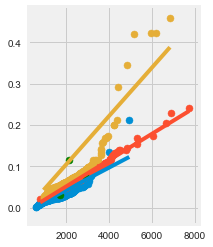

0.7792947318779706 0.9881541559955245 0.33222809969314915


In [12]:

#zip code 1
xs1 = np.sort(np.array(zdict[list(zipcodes)[0]]['sqft_living']))
ys1 = np.sort(np.array(zdict[list(zipcodes)[0]]['price']))
m1,b1 = best_fit_slope_and_intercept(xs1,ys1)
regression_line1 = [(m1*x)+b for x in xs1]
predict_x1 = mean(xs1)
predict_y1 = (m1*predict_x1)+b1
r_squared1 = coefficient_of_determination(ys1, regression_line1)


#zip code 2
xs2 = np.sort(np.array(zdict[list(zipcodes)[50]]['sqft_living']))
ys2 = np.sort(np.array(zdict[list(zipcodes)[50]]['price']))
m2,b2 = best_fit_slope_and_intercept(xs2,ys2)
regression_line2 = [(m2*x)+b for x in xs2]
predict_x2 = mean(xs2)
predict_y2 = (m2*predict_x2)+b2
r_squared2 = coefficient_of_determination(ys2, regression_line2)


#zip code 3
xs3 = np.sort(np.array(zdict[list(zipcodes)[35]]['sqft_living']))
ys3 = np.sort(np.array(zdict[list(zipcodes)[35]]['price']))
m3,b3 = best_fit_slope_and_intercept(xs3,ys3)
regression_line3 = [(m3*x)+b for x in xs3]
predict_x3 = mean(xs3)
predict_y3 = (m3*predict_x2)+b3
r_squared3 = coefficient_of_determination(ys3, regression_line3)
    
plt.subplot(1,2,1)
plt.scatter(xs1,ys1)
plt.scatter(predict_x1,predict_y1, color = 'g')
plt.plot(xs1,regression_line1)


plt.subplot(1,2,1)
plt.scatter(xs2,ys2)
plt.scatter(predict_x2,predict_y2, color = 'g')
plt.plot(xs2,regression_line2)


plt.subplot(1,2,1)
plt.scatter(xs3,ys3)
plt.scatter(predict_x3,predict_y3, color = 'g')
plt.plot(xs3,regression_line3)
plt.show()
print(r_squared1, r_squared2, r_squared3)

As you can see, the relationship between housing price vs size isnt as linear for every zip code - there are other factors we must consider

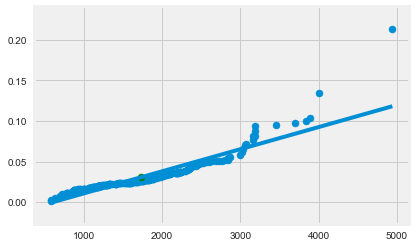

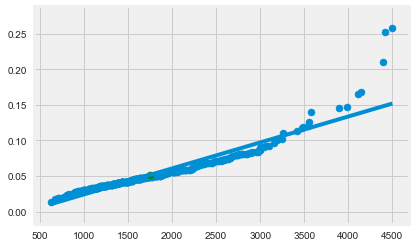

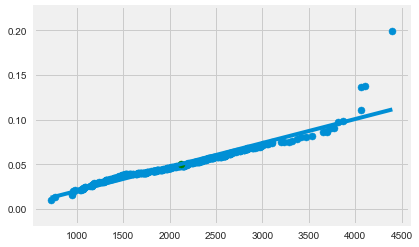

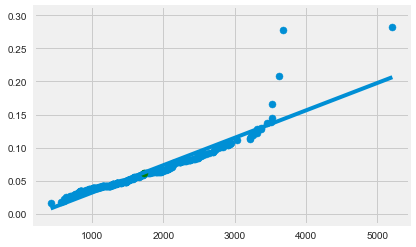

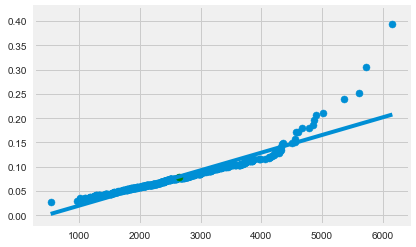

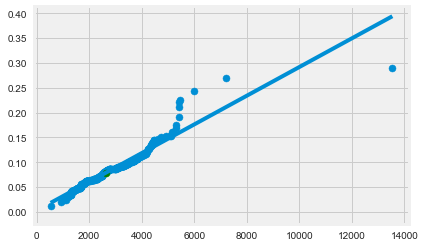

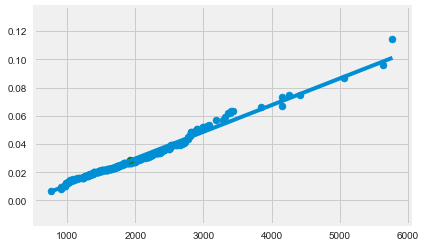

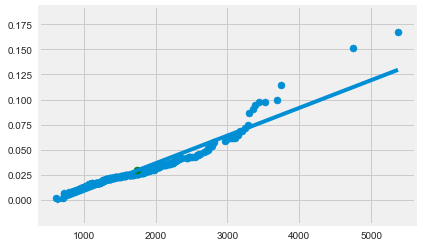

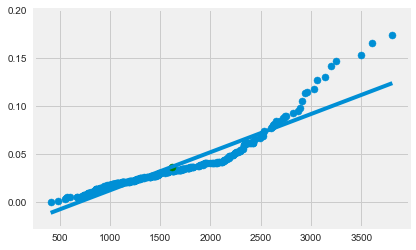

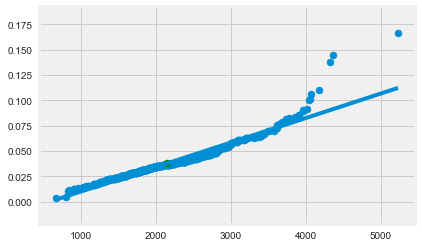

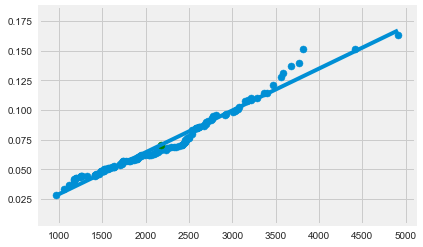

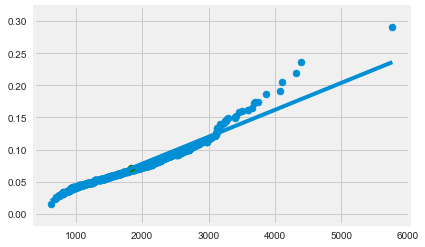

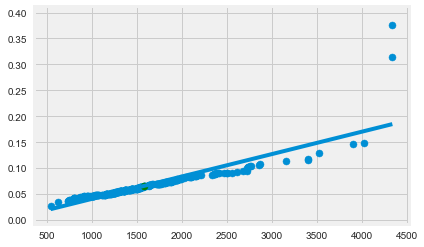

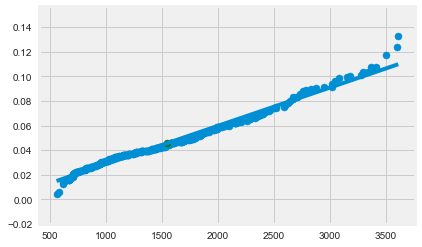

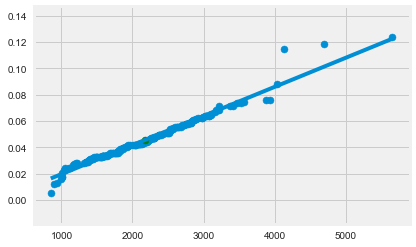

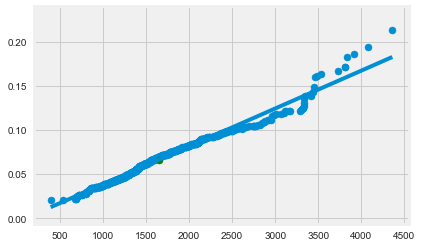

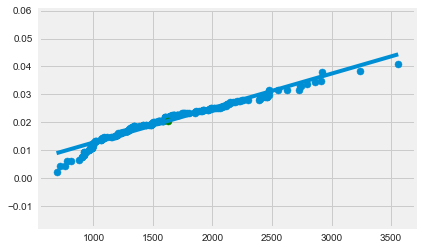

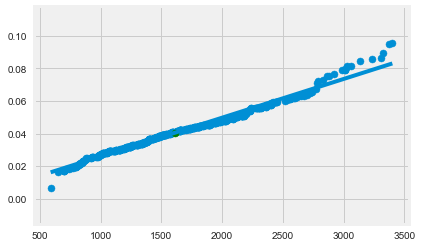

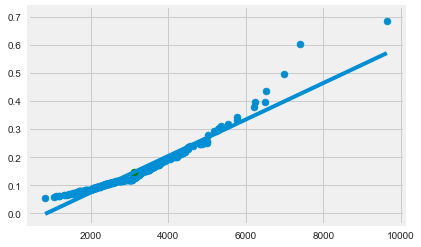

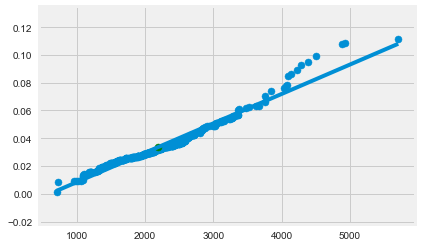

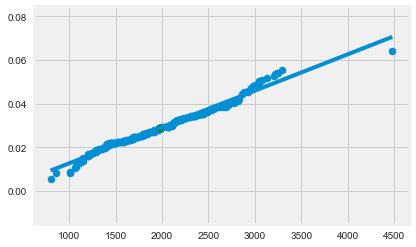

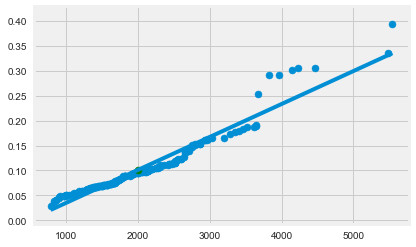

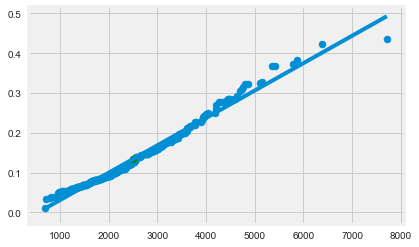

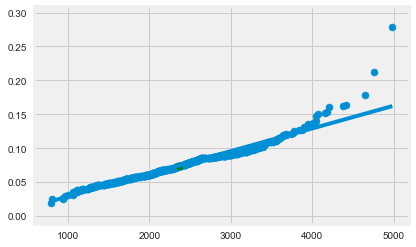

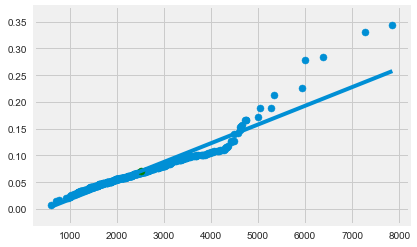

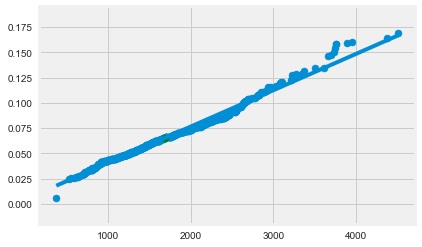

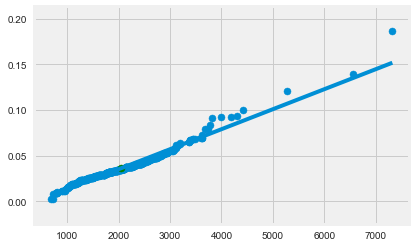

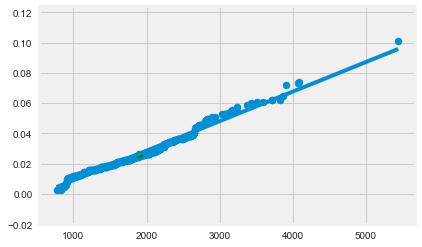

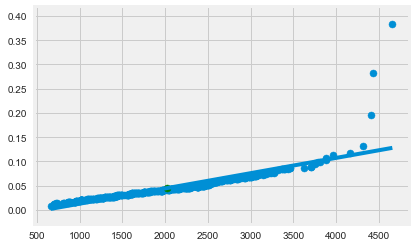

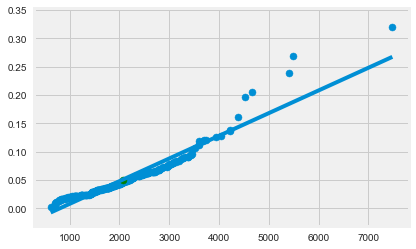

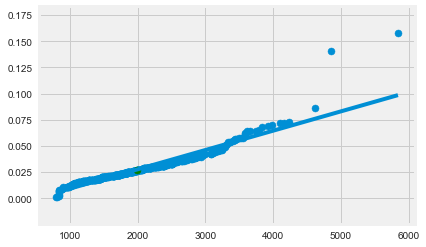

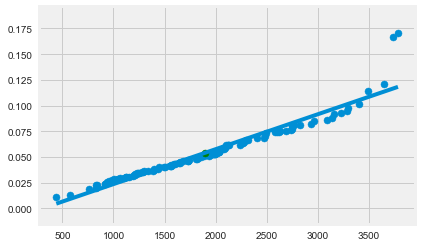

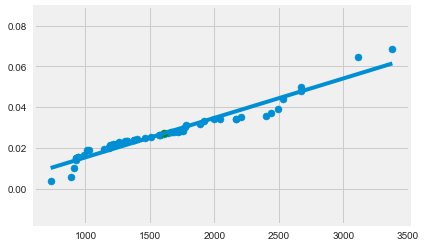

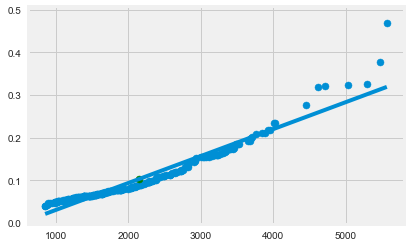

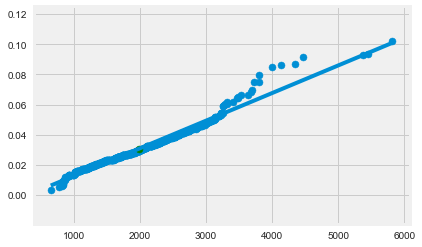

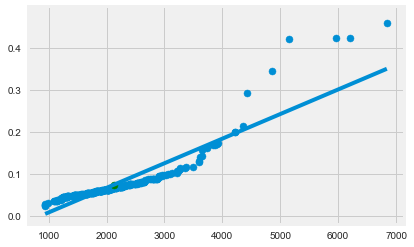

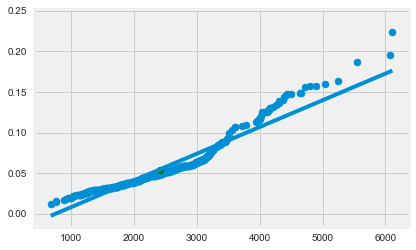

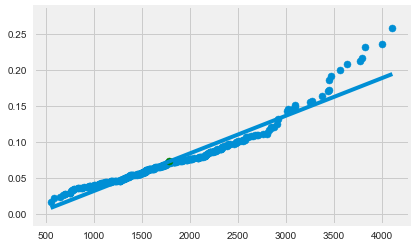

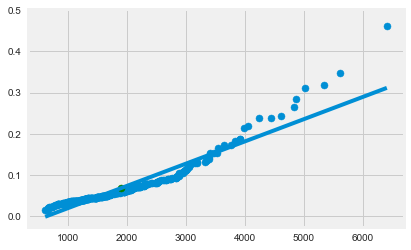

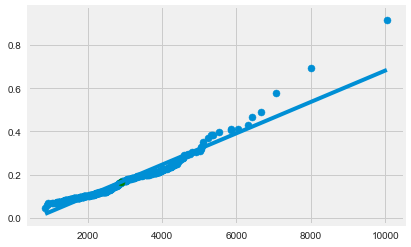

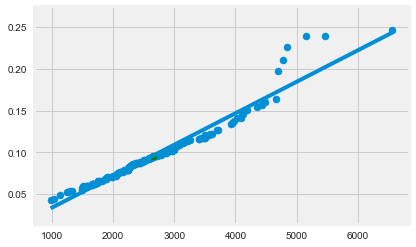

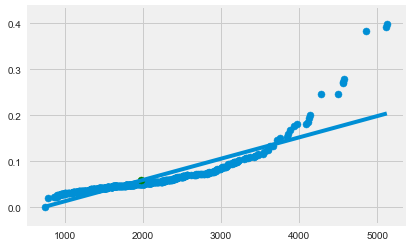

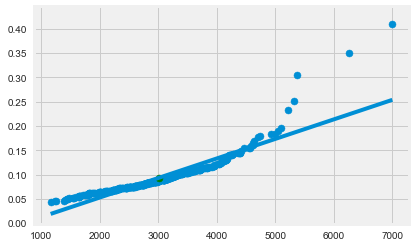

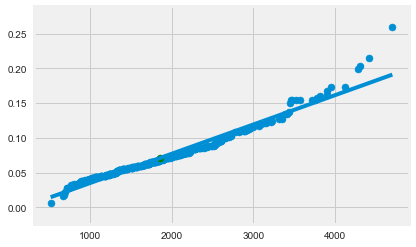

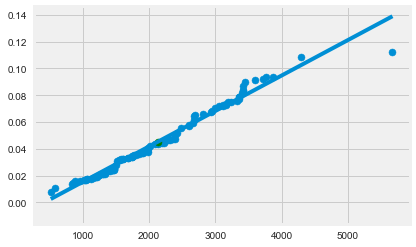

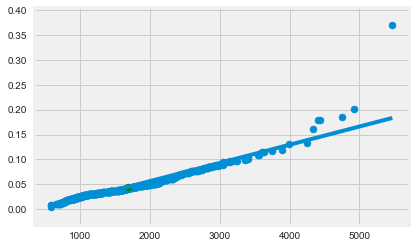

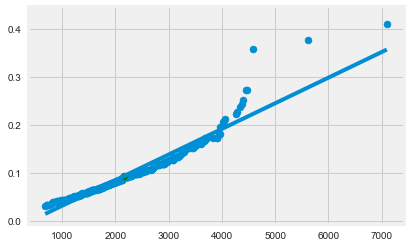

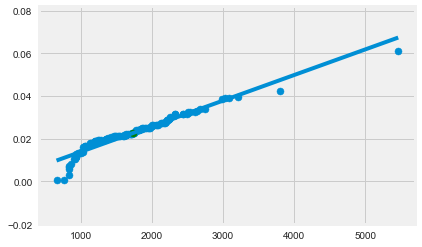

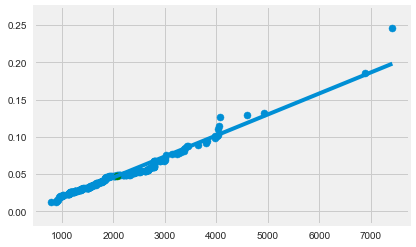

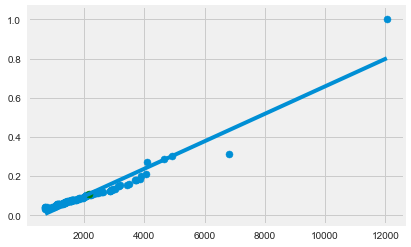

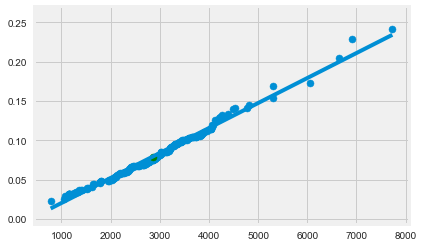

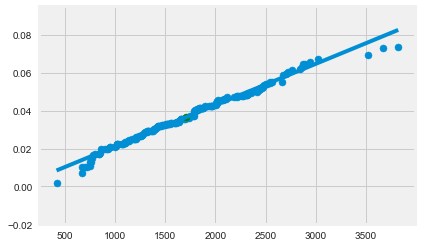

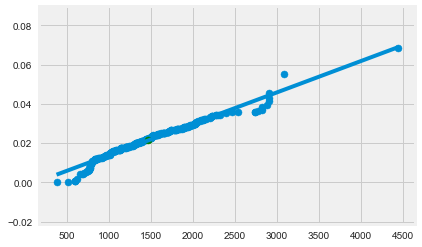

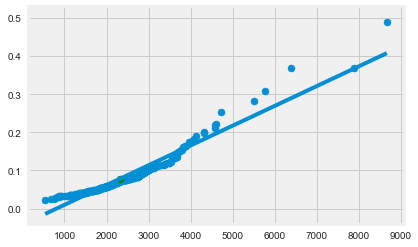

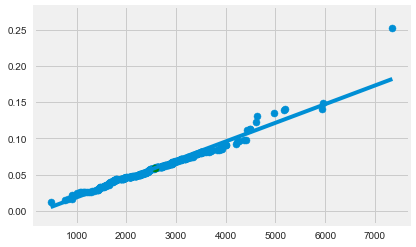

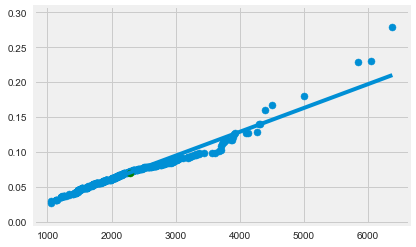

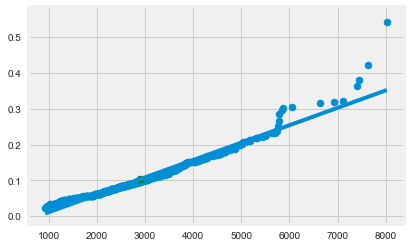

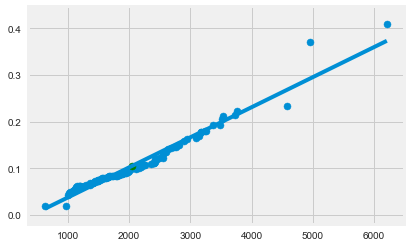

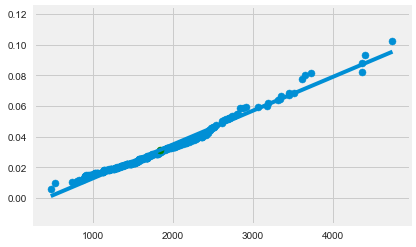

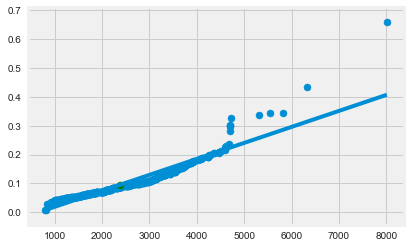

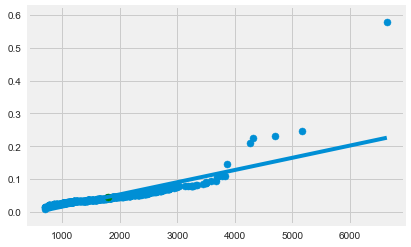

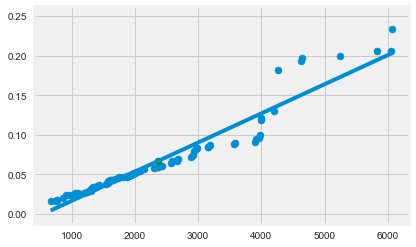

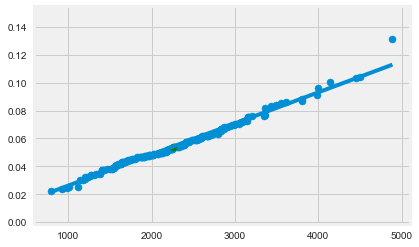

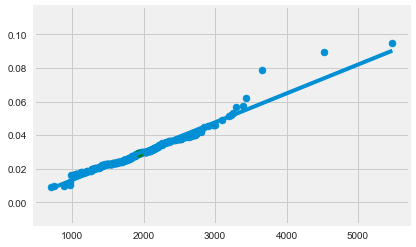

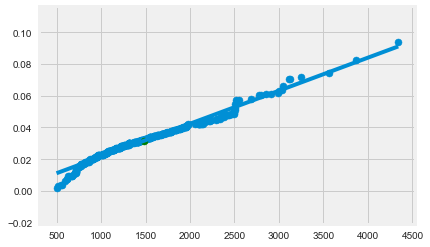

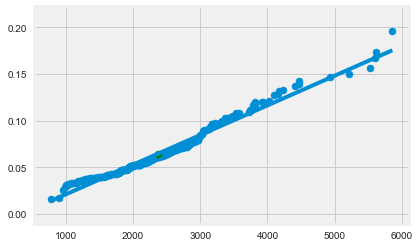

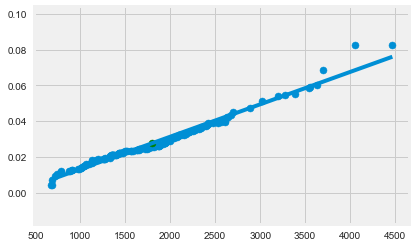

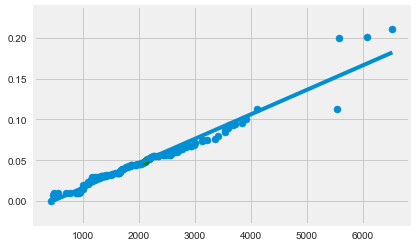

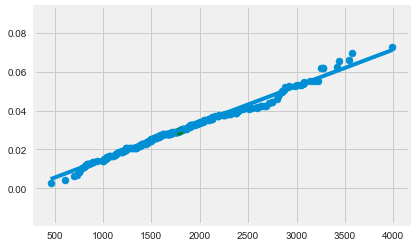

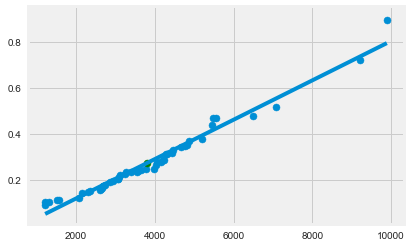

0.9256466257751398


In [14]:

#linear regresesion
rsqlist1 = []
lrpltlist=[]
lrxs = []
lrys = []


for zipcode in zdict:
    xs = np.sort(np.array(zdict[zipcode]['sqft_living']))
    ys = np.sort(np.array(zdict[zipcode]['price']))
    m,b = best_fit_slope_and_intercept(xs,ys)
    lrxs.append(xs)
    lrys.append(ys)
    regression_line = [(m*x)+b for x in xs]

    predict_x = mean(xs)
    predict_y = (m*predict_x)+b

    r_squared = coefficient_of_determination(ys, regression_line)
    rsqlist1.append(r_squared)
    

    plt.scatter(xs,ys)
    plt.scatter(predict_x,predict_y, color = 'g')
    plt.plot(xs,regression_line)
    plt.show()
print(mean(rsqlist1))

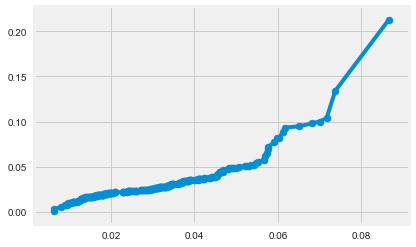

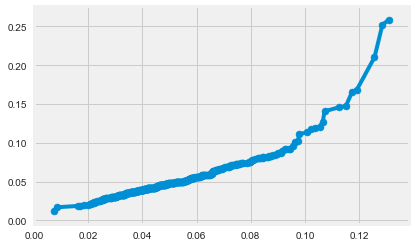

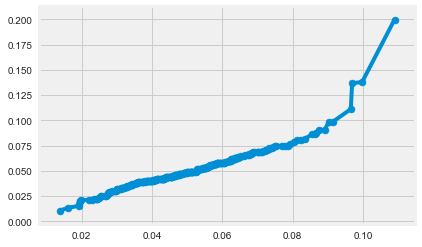

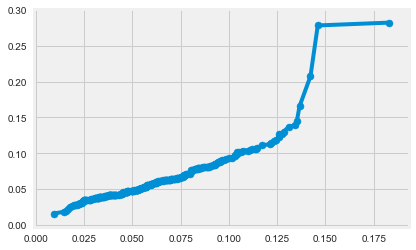

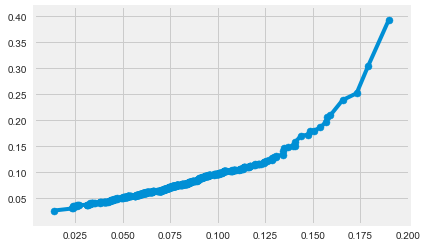

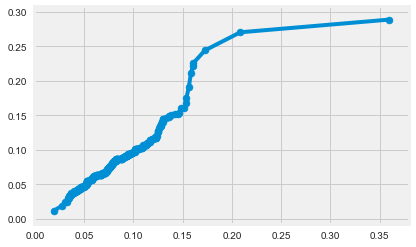

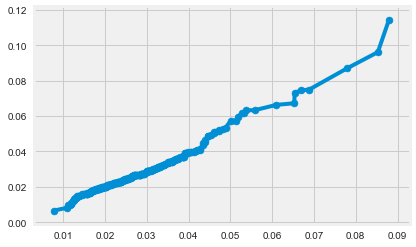

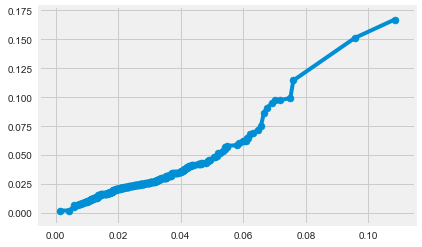

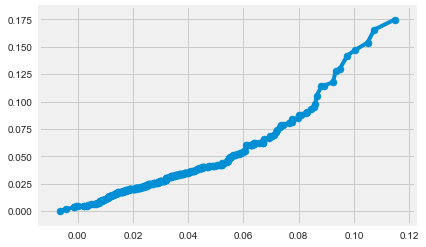

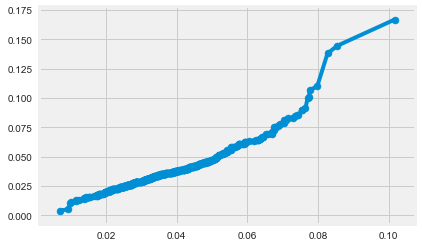

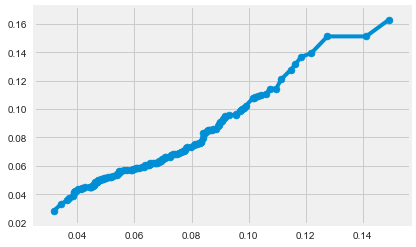

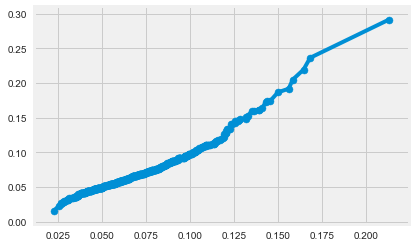

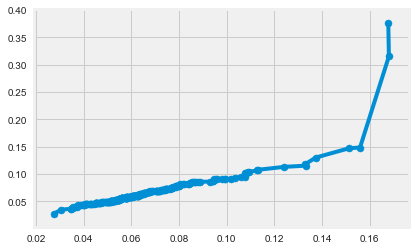

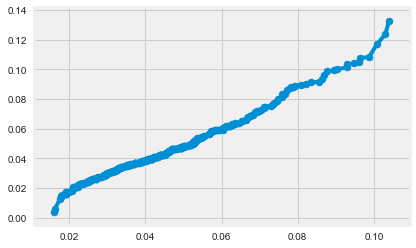

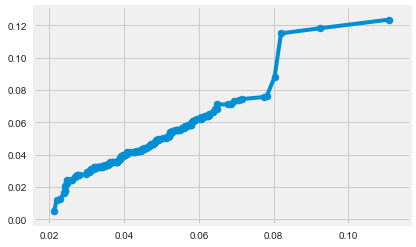

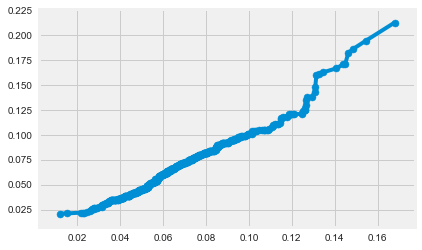

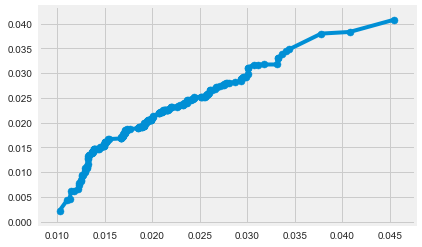

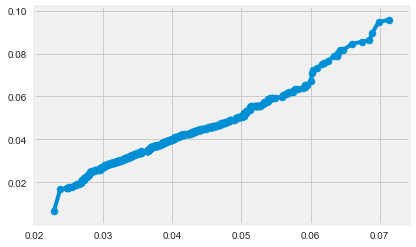

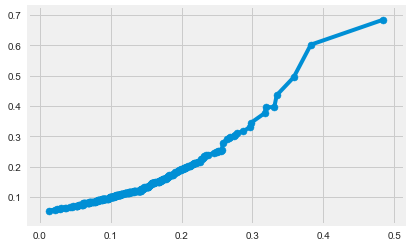

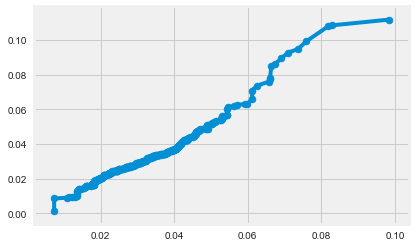

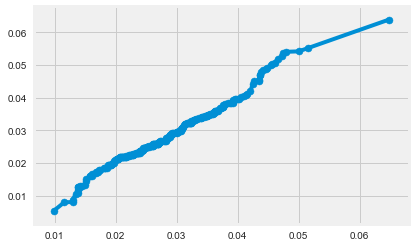

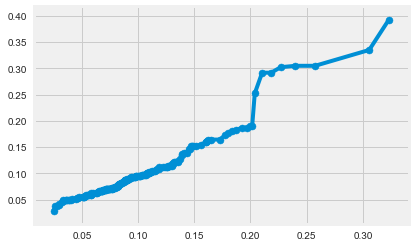

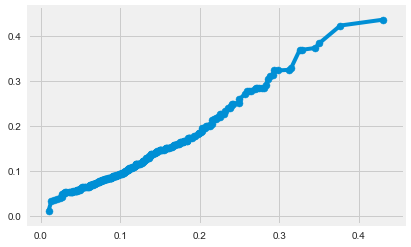

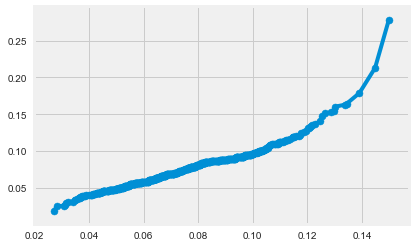

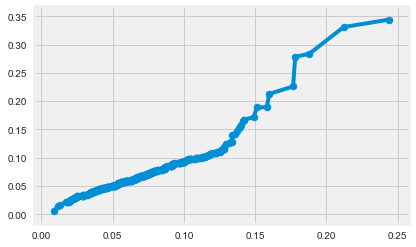

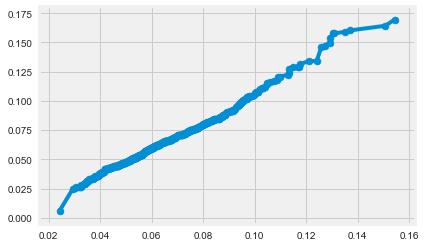

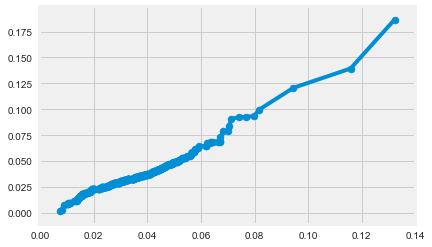

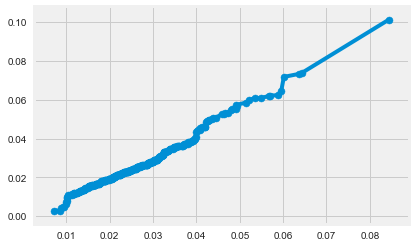

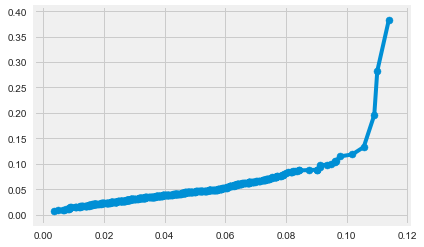

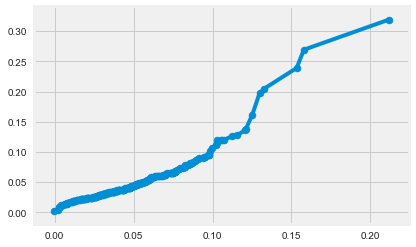

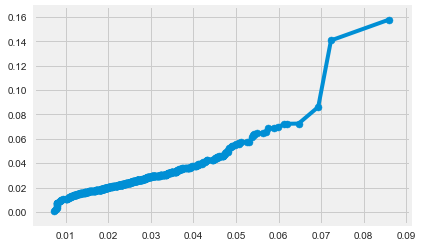

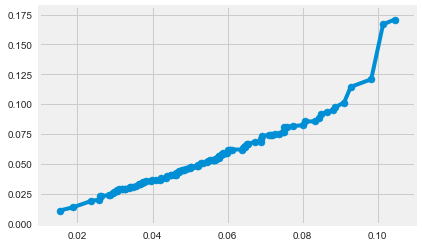

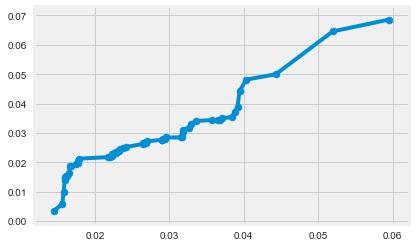

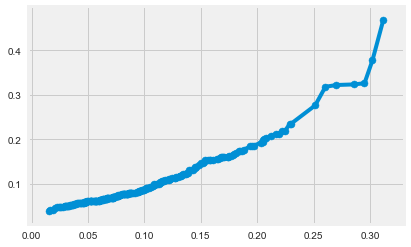

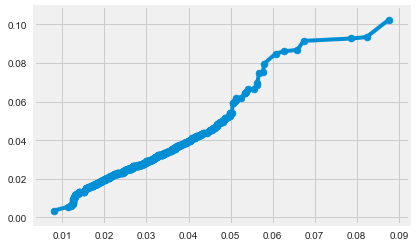

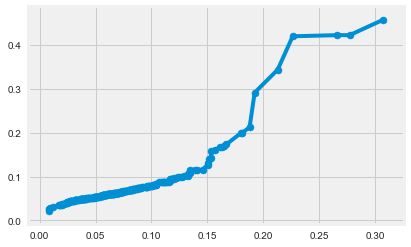

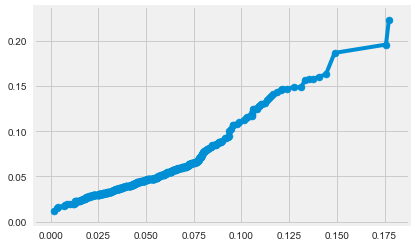

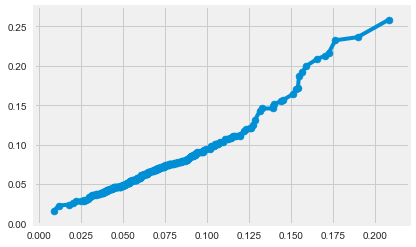

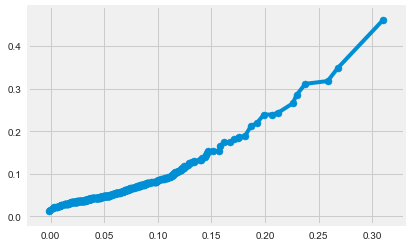

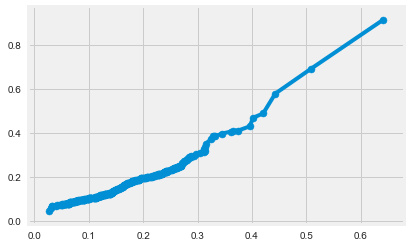

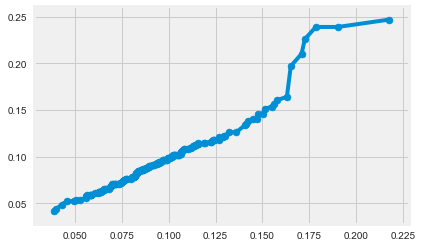

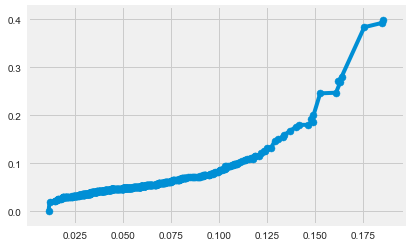

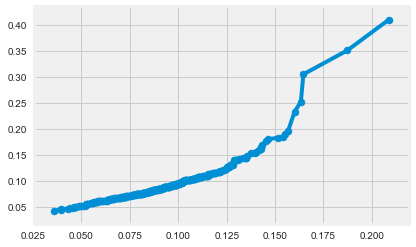

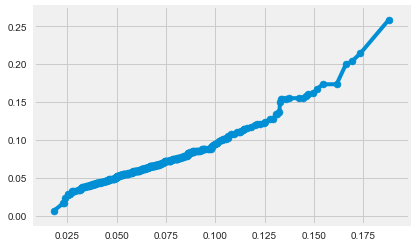

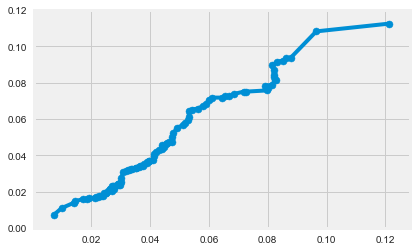

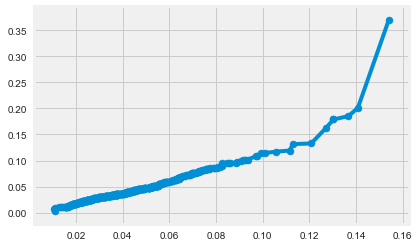

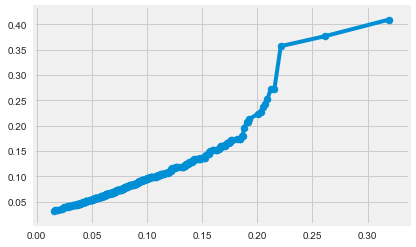

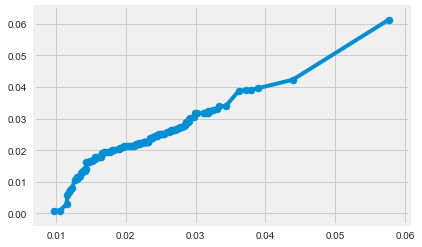

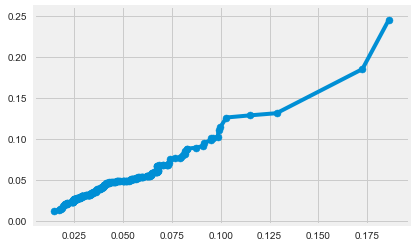

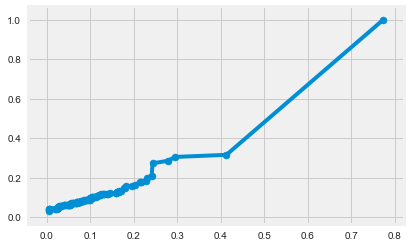

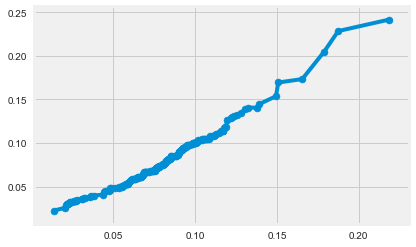

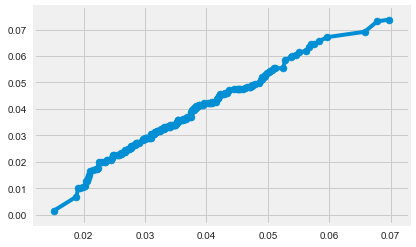

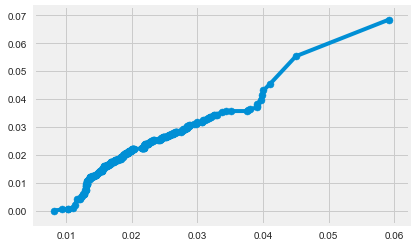

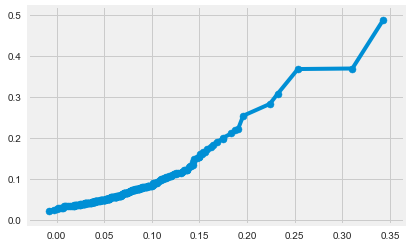

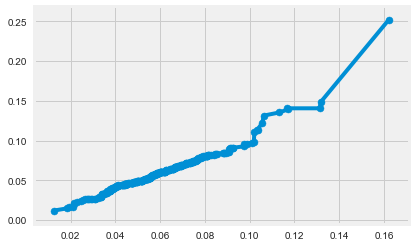

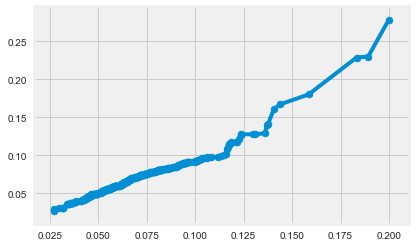

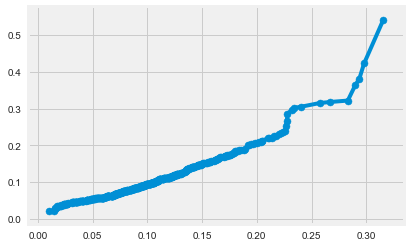

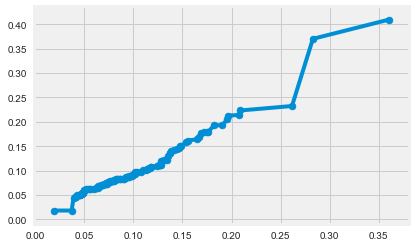

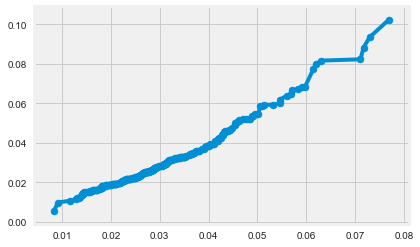

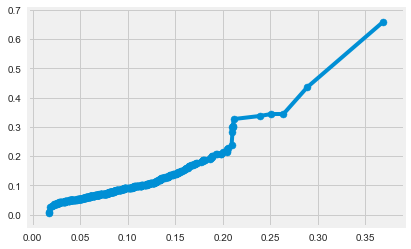

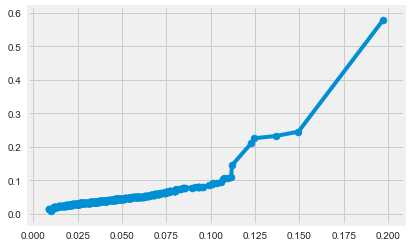

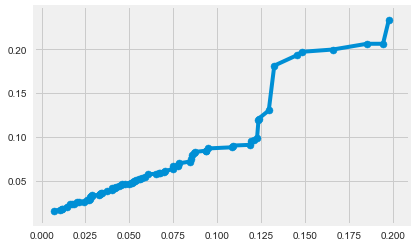

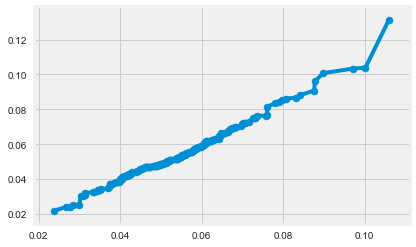

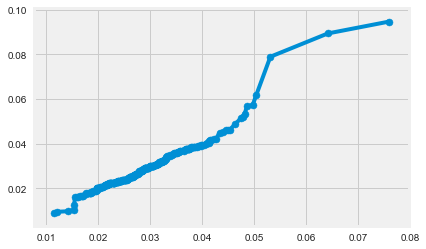

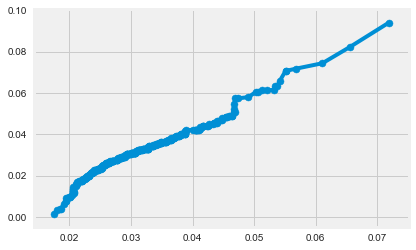

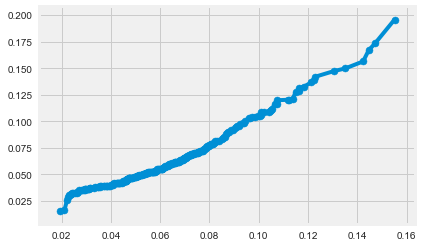

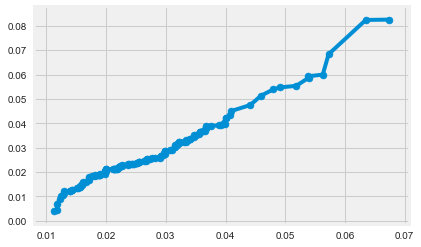

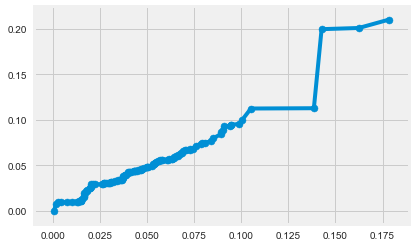

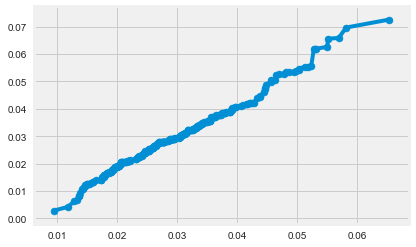

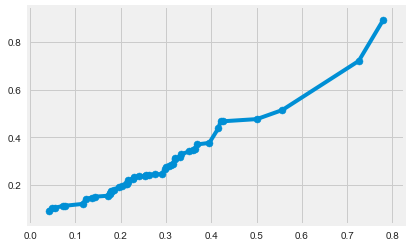

0.9058559440869567


In [20]:
reg = linear_model.LinearRegression()
#reg.fit(df[['sqft_living','grade','sqft_living15']],df.price)
rsqlist2 = []
mrxs = []

for zipcode in zdict:
    col_sqft = np.sort(np.array(zdict[zipcode]['sqft_living']))
    col_bathrooms = np.sort(np.array(zdict[zipcode]['bathrooms']))
    col_sqft15 = np.sort(np.array(zdict[zipcode]['sqft_living15']))
    ys = np.sort(np.array(zdict[zipcode]['price']))
    reg.fit(zdict[zipcode][['sqft_living','bathrooms','sqft_living15']],zdict[zipcode].price)
    m,b = reg.coef_, reg.intercept_
    
    regression_line = [reg.coef_[0]*x[0]+reg.coef_[1]*x[1]+reg.coef_[2]*x[2]+b for x in zip(col_sqft,col_bathrooms,col_sqft15)]
    #mrxs.append(regression_line)

    r_squared = coefficient_of_determination(ys, regression_line)
    rsqlist2.append(r_squared)
    
    #plt.subplot(223)
    plt.plot(regression_line,ys)
    plt.scatter(regression_line,ys)
    #plt.scatter(predict_x,predict_y, color = 'g')
    #plt.plot(xs,regression_line)
    plt.show()
print(mean(rsqlist2))

In [91]:
np.std(rsqlist2)

0.0707176391491641

In [70]:
list(zipcodes)[35]

98008

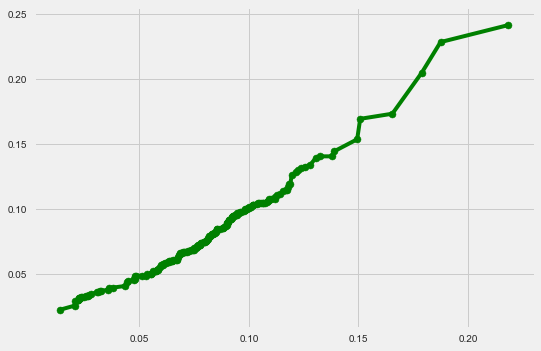

0.971042260051737


In [82]:
col_sqft2 = np.sort(np.array(zdict[list(zipcodes)[50]]['sqft_living']))
col_bathrooms2 = np.sort(np.array(zdict[list(zipcodes)[50]]['bathrooms']))
col_sqft152 = np.sort(np.array(zdict[list(zipcodes)[50]]['sqft_living15']))
ys2 = np.sort(np.array(zdict[list(zipcodes)[50]]['price']))
reg.fit(zdict[list(zipcodes)[50]][['sqft_living','bathrooms','sqft_living15']],zdict[list(zipcodes)[50]].price)
m2,b2 = reg.coef_, reg.intercept_
regression_line2 = [reg.coef_[0]*x[0]+reg.coef_[1]*x[1]+reg.coef_[2]*x[2]+b2 for x in zip(col_sqft,col_bathrooms,col_sqft15)]
    #mrxs.append(regression_line)

r_squared2 = coefficient_of_determination(ys2, regression_line2)

plt.plot(regression_line2,ys2,color='g')
plt.scatter(regression_line2,ys2,color='g')
plt.show()
print(r_squared2)

In [137]:
reg = linear_model.LinearRegression()
reg.fit(zdict[98178][['sqft_living','grade','sqft_living15']],zdict[98178].price)
m,b = reg.coef_, reg.intercept_

In [19]:
reg = linear_model.LinearRegression()
#reg.fit(df[['sqft_living','grade','sqft_living15']],df.price)
for zipcode in zdict:
    col_sqft = np.sort(np.array(zdict[zipcode]['sqft_living']))
    col_condition = np.sort(np.array(zdict[zipcode]['condition']))
    col_sqft15 = np.sort(np.array(zdict[zipcode]['sqft_living15']))
    ys = np.sort(np.array(zdict[zipcode]['price']))
    reg.fit(zdict[zipcode][['sqft_living','condition','sqft_living15']],zdict[zipcode].price)
    #m,b = best_fit_slope_and_intercept(xs,ys)
    m,b = reg.coef_, reg.intercept_
    #regression_line = [(m*x)+b for x in xs]
    regression_line = [reg.coef_[0]*x[0]+reg.coef_[1]*x[1]+reg.coef_[2]*x[2]+b for x in zip(col_sqft,col_condition,col_sqft15)]
   # predict_x = mean(xs)
    #predict_y = (m*predict_x)+b

    r_squared = coefficient_of_determination(ys, regression_line)
    rsqlist.append(r_squared)
    
    plt.subplot(223)
    plt.scatter(regression_line,ys)
    #plt.scatter(predict_x,predict_y, color = 'g')
    #plt.plot(xs,regression_line)
    plt.show()
print(mean(rsqlist))

NameError: name 'rsqlist' is not defined

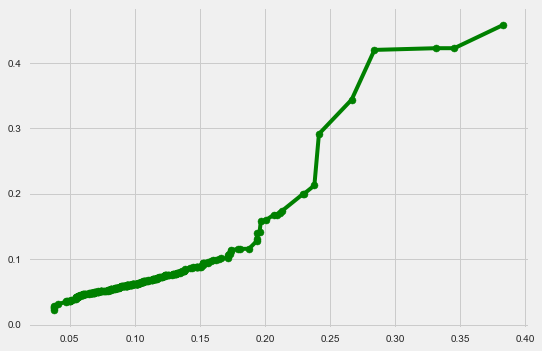

0.4522401713468073


In [86]:
col_sqft3 = np.sort(np.array(zdict[list(zipcodes)[35]]['sqft_living']))
col_bathrooms3 = np.sort(np.array(zdict[list(zipcodes)[35]]['bathrooms']))
col_sqft153 = np.sort(np.array(zdict[list(zipcodes)[35]]['sqft_living15']))
ys3 = np.sort(np.array(zdict[list(zipcodes)[35]]['price']))
reg.fit(zdict[list(zipcodes)[35]][['sqft_living','bathrooms','sqft_living15']],zdict[list(zipcodes)[35]].price)
m3,b3 = reg.coef_, reg.intercept_
regression_line = [reg.coef_[0]*x[0]+reg.coef_[1]*x[1]+reg.coef_[2]*x[2]+b3 for x in zip(col_sqft,col_bathrooms,col_sqft15)]
    #mrxs.append(regression_line)

r_squared3 = coefficient_of_determination(ys3, regression_line3)
#rsqlist2.append(r_squared)
    
    #plt.subplot(223)
plt.plot(regression_line3,ys3,color='g')
plt.scatter(regression_line3,ys3,color='g')
    #plt.scatter(predict_x,predict_y, color = 'g')
    #plt.plot(xs,regression_line)
plt.show()
print(r_squared3)

In [201]:
x_train,x_test,y_train,y_test = train_test_split(df['sqft_living'],df['price'],test_size=0.2,random_state=4)

In [203]:
reg.fit([x_train],[y_train])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [207]:
sum(sum(reg.coef_))

0.0

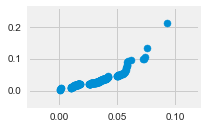

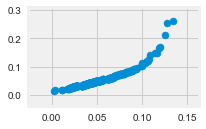

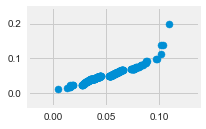

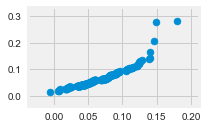

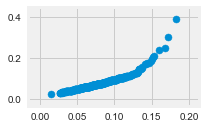

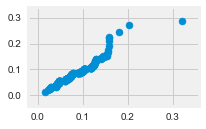

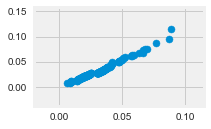

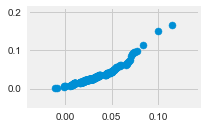

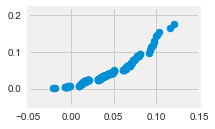

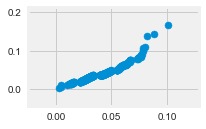

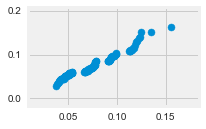

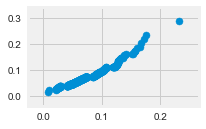

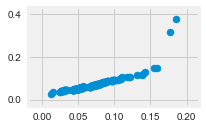

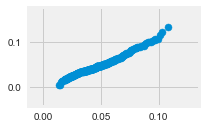

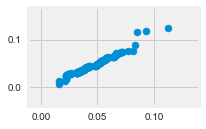

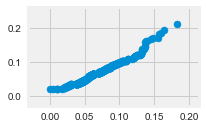

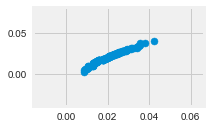

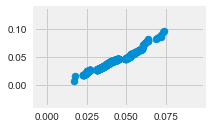

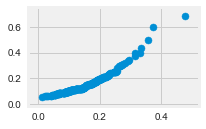

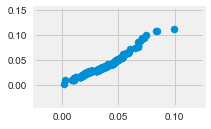

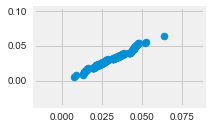

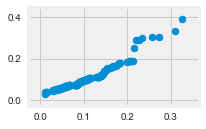

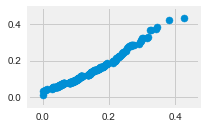

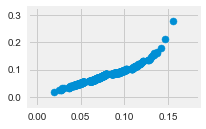

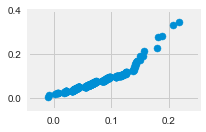

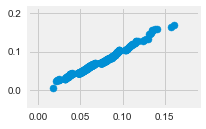

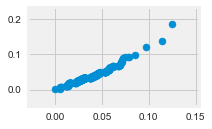

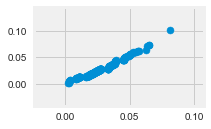

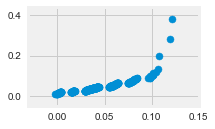

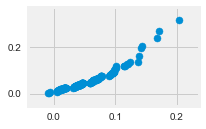

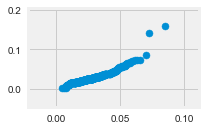

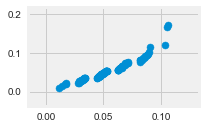

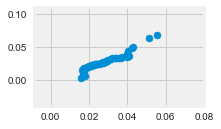

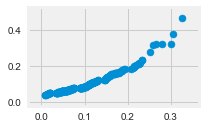

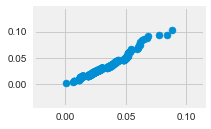

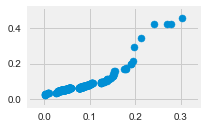

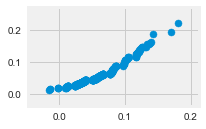

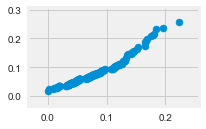

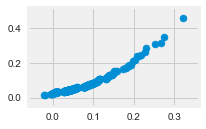

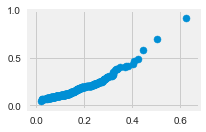

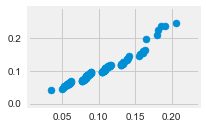

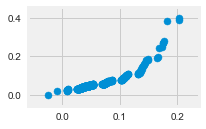

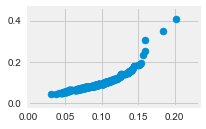

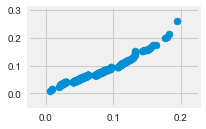

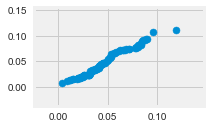

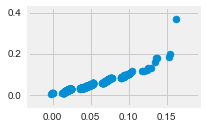

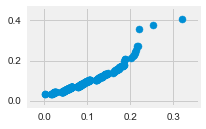

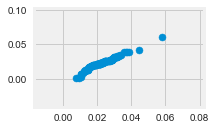

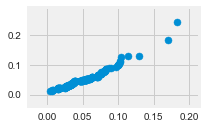

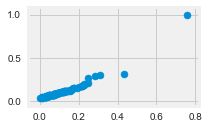

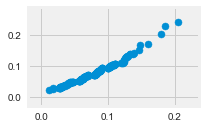

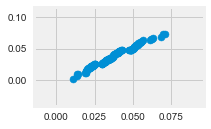

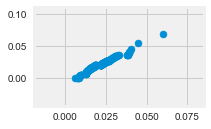

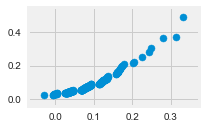

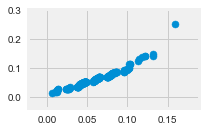

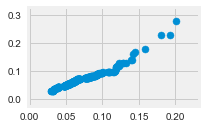

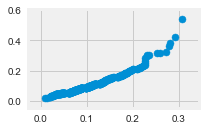

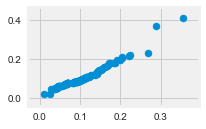

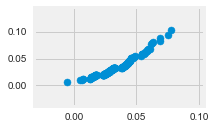

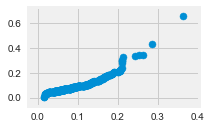

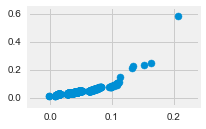

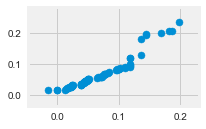

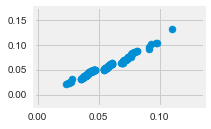

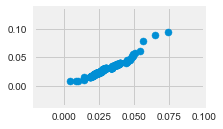

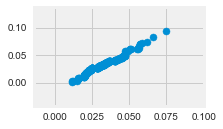

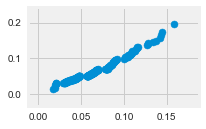

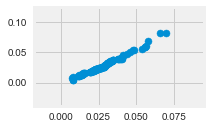

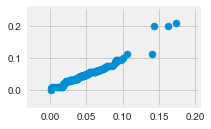

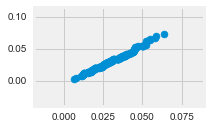

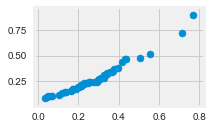

0.9059812203092333


In [21]:
reg = linear_model.LinearRegression()
rsqlist=[]
#reg.fit(df[['sqft_living','grade','sqft_living15']],df.price)
for zipcode in zdict:
    col_sqft = np.sort(np.array(zdict[zipcode]['sqft_living']))
    col_grade= np.sort(np.array(zdict[zipcode]['grade']))
    col_sqft15 = np.sort(np.array(zdict[zipcode]['sqft_living15']))
    ys = np.sort(np.array(zdict[zipcode]['price']))
    reg.fit(zdict[zipcode][['sqft_living','grade','sqft_living15']],zdict[zipcode].price)
    #m,b = best_fit_slope_and_intercept(xs,ys)
    m,b = reg.coef_, reg.intercept_
    #regression_line = [(m*x)+b for x in xs]
    regression_line = [reg.coef_[0]*x[0]+reg.coef_[1]*x[1]+reg.coef_[2]*x[2]+b for x in zip(col_sqft,col_grade,col_sqft15)]
   # predict_x = mean(xs)
    #predict_y = (m*predict_x)+b

    r_squared = coefficient_of_determination(ys, regression_line)
    rsqlist.append(r_squared)
    
    plt.subplot(223)
    plt.scatter(regression_line,ys)
    #plt.scatter(predict_x,predict_y, color = 'g')
    #plt.plot(xs,regression_line)
    plt.show()
print(mean(rsqlist))

In [22]:
print(mean(rsqlist))

0.9059812203092333


/Users/robertfustero/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/robertfustero/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-85a39da31c67>", line 1, in <module>
    df.loc[df['price']<200000].groupby('price').hist()
  File "/Users/robertfustero/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py", line 832, in wrapper
    return self.apply(curried)
  File "/Users/robertfustero/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py", line 918, in apply
    result = self._python_apply_general(f)
  File "/Users/robertfustero/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py", line 936, in _python_apply_general
    self.axis)
  File "/Users/robertfustero/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py", line 2273, in apply
    res = f(group)
  File "/Users/robertfustero/anaconda3/lib/python3.7/site-packages/

KeyboardInterrupt: 

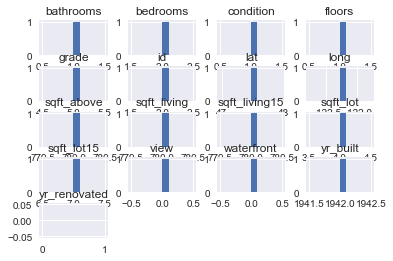

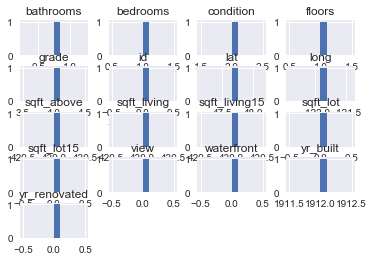

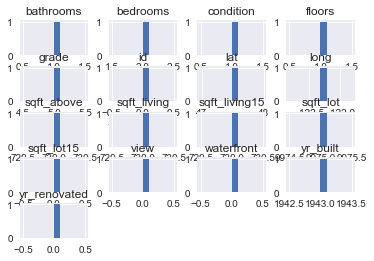

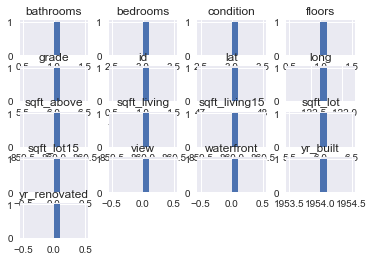

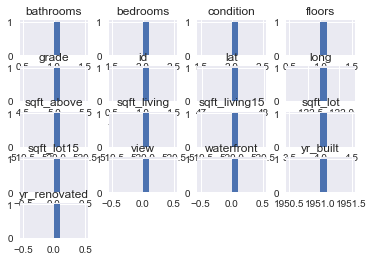

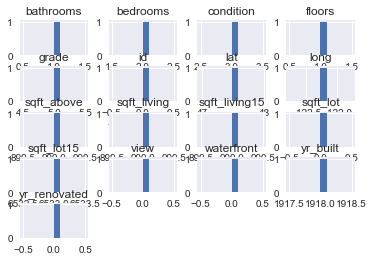

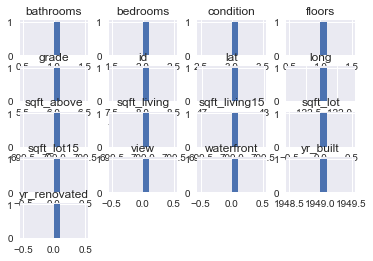

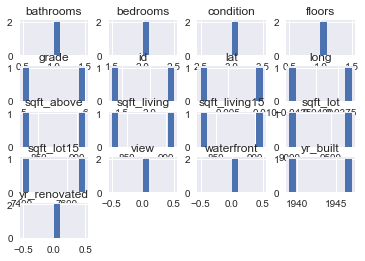

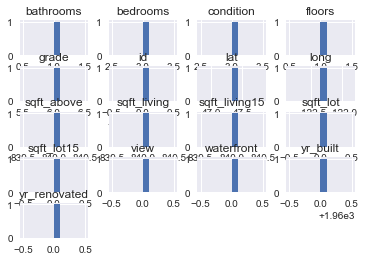

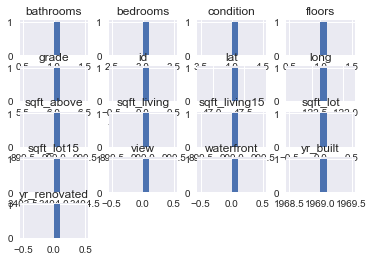

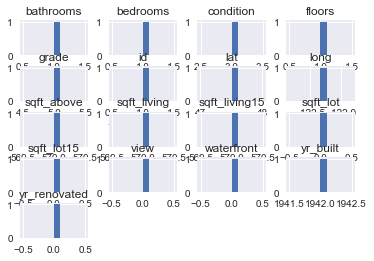

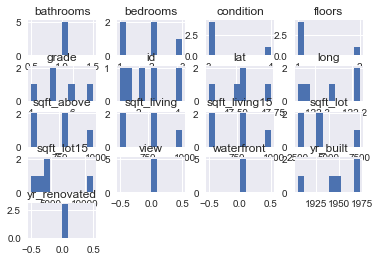

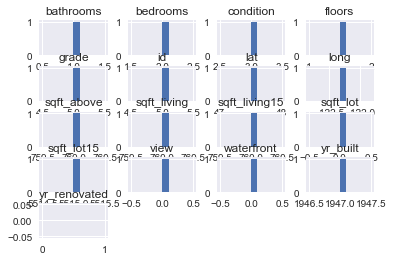

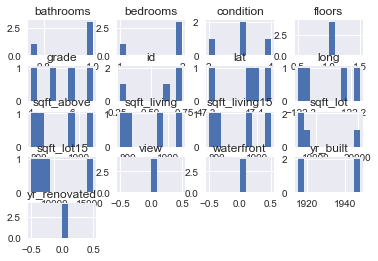

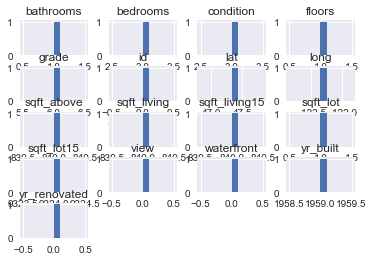

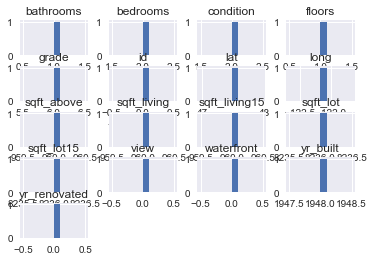

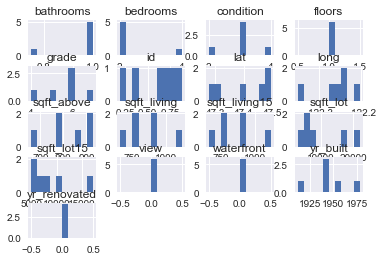

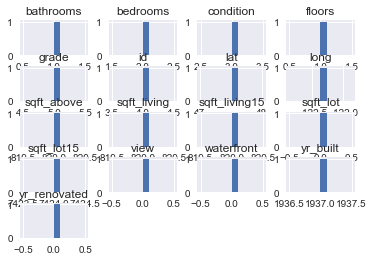

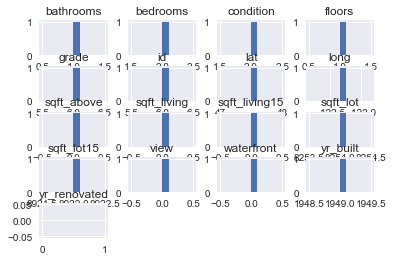

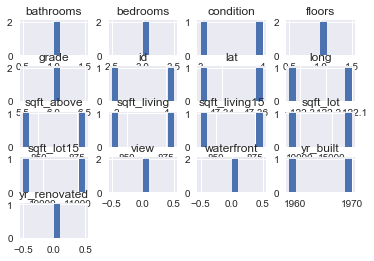

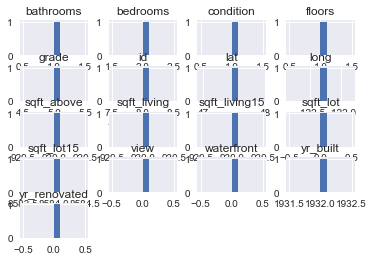

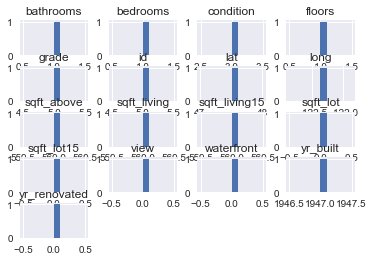

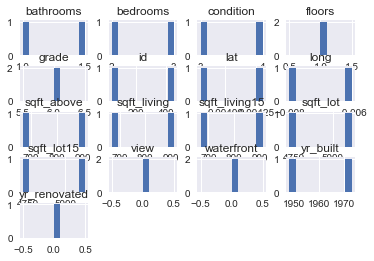

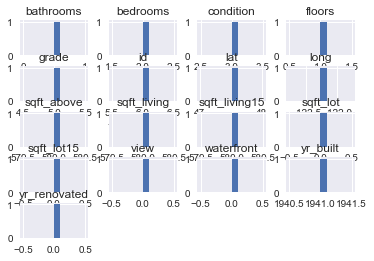

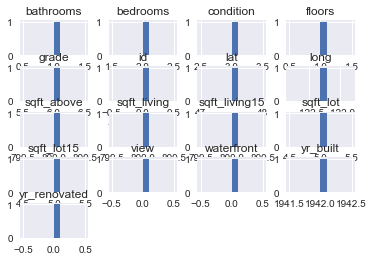

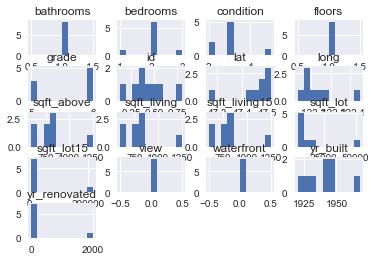

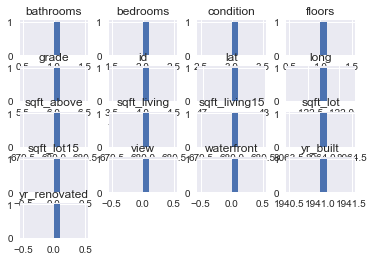

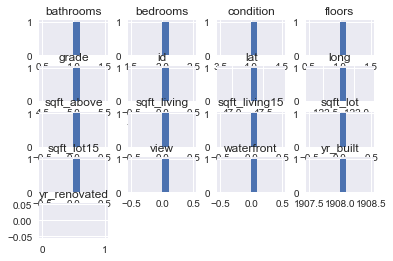

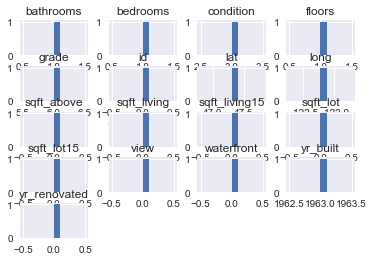

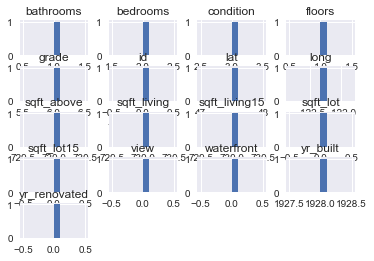

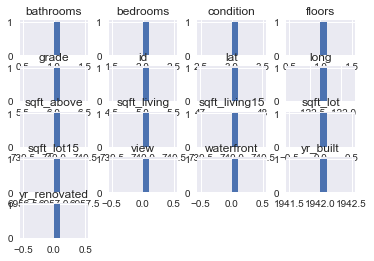

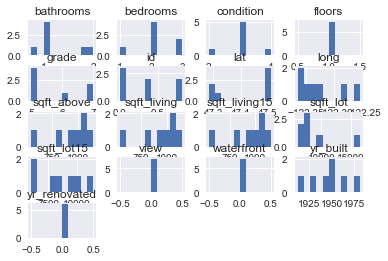

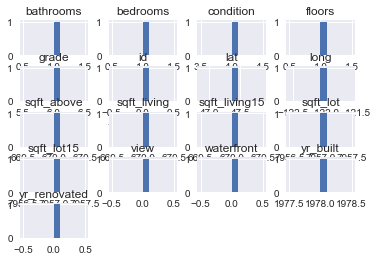

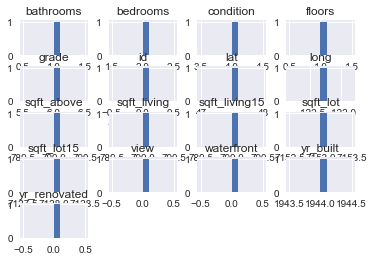

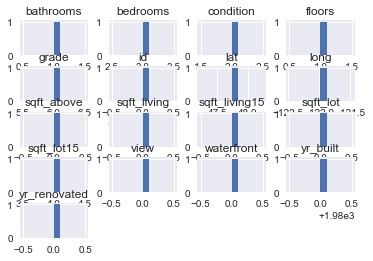

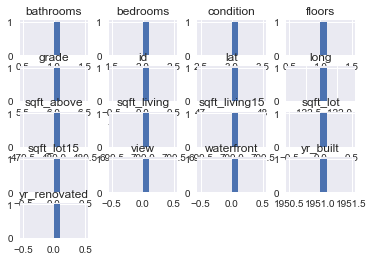

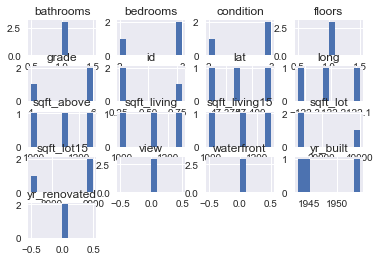

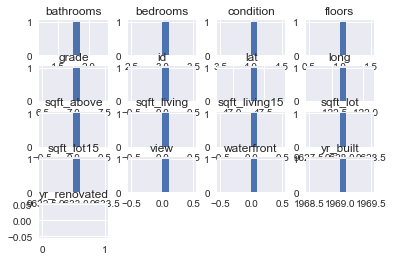

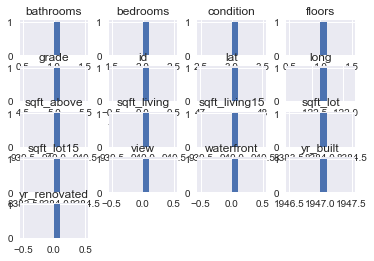

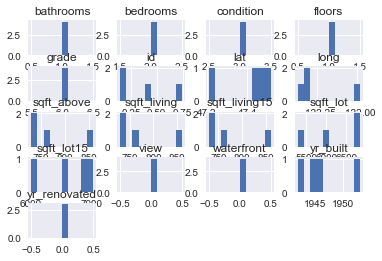

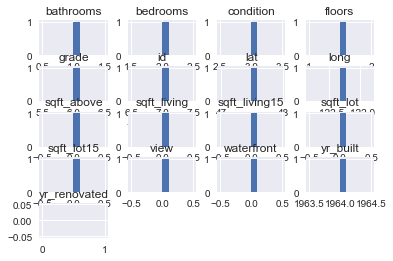

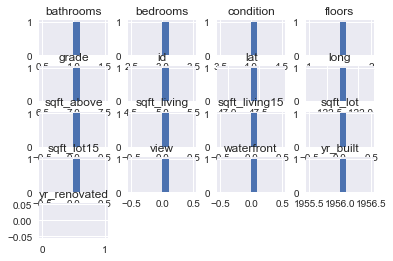

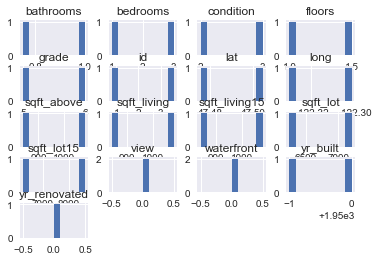

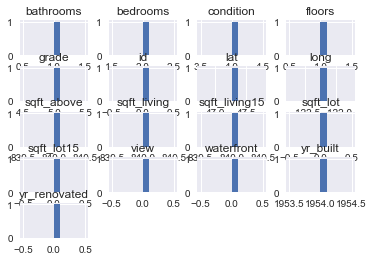

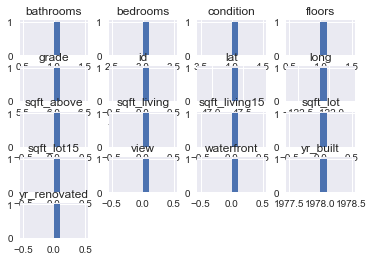

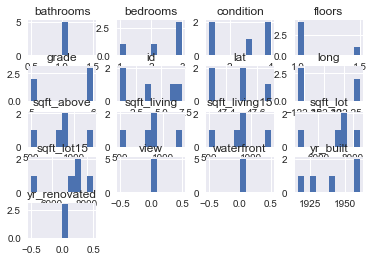

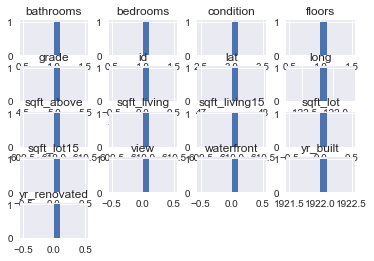

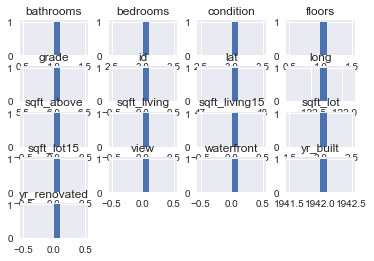

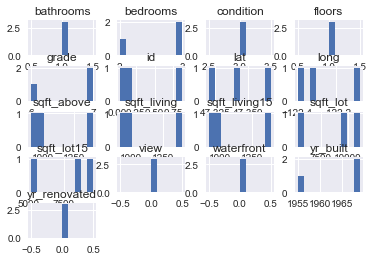

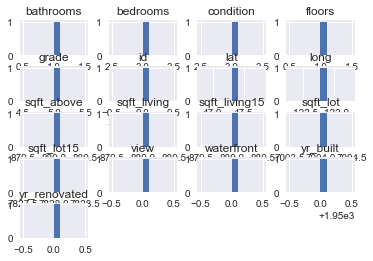

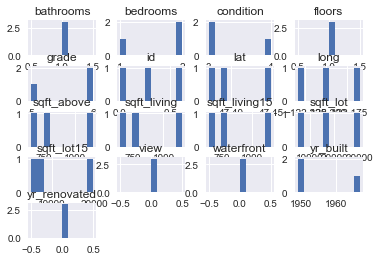

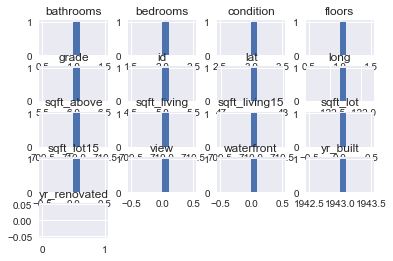

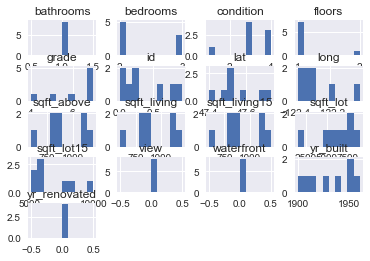

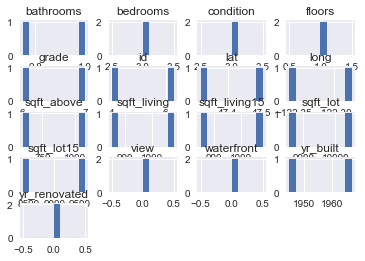

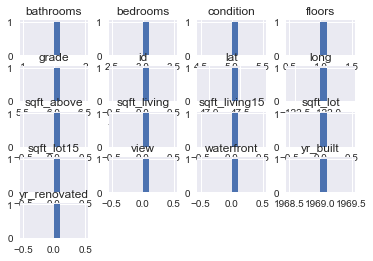

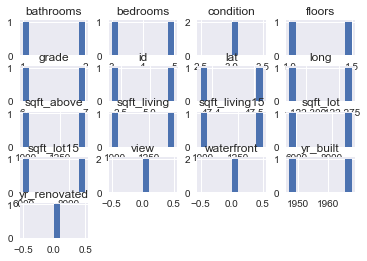

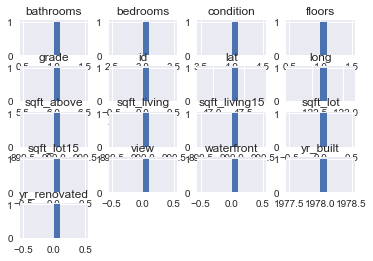

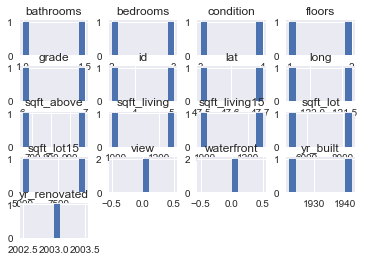

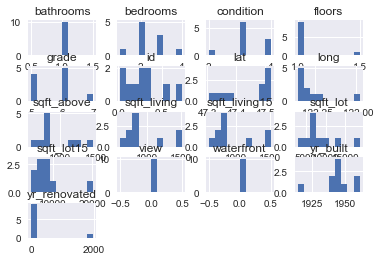

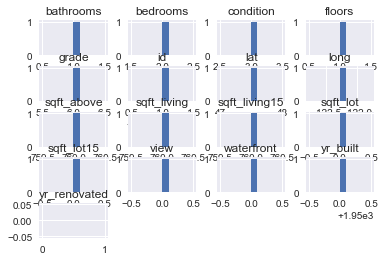

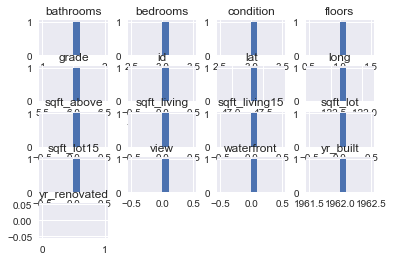

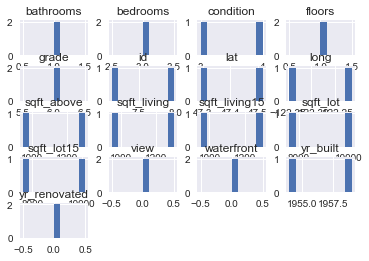

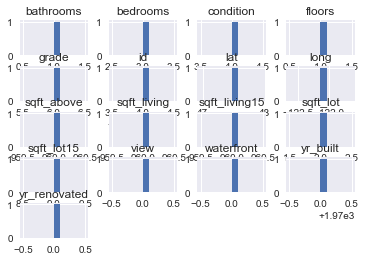

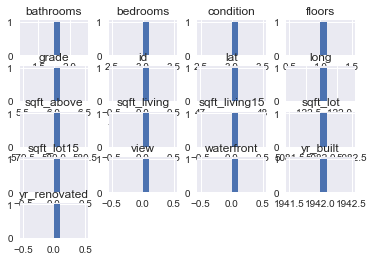

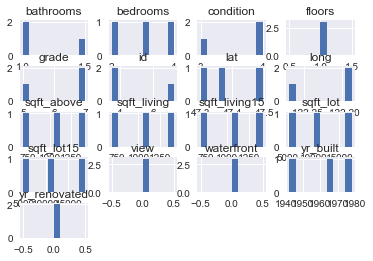

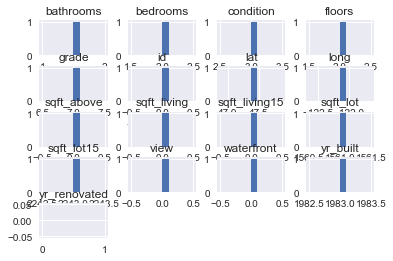

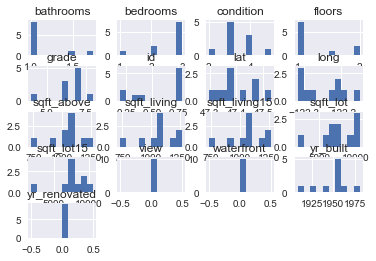

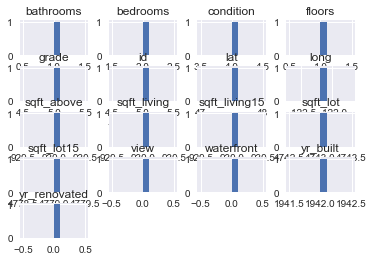

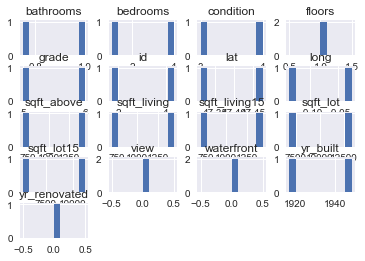

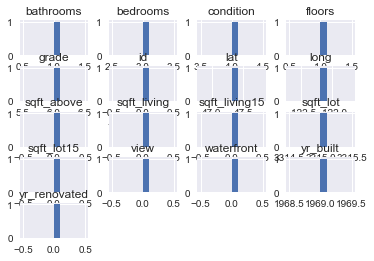

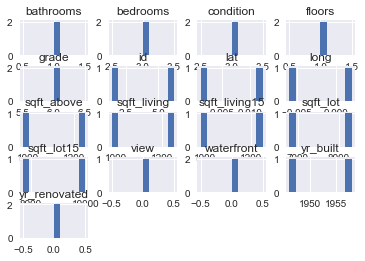

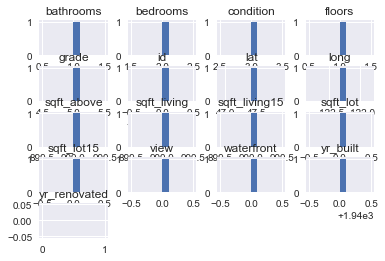

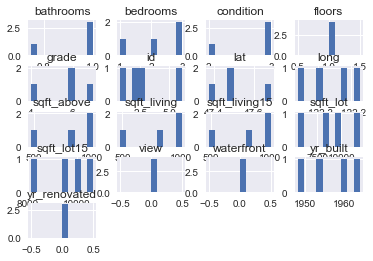

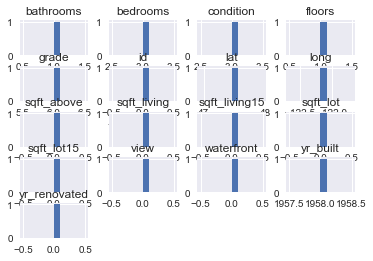

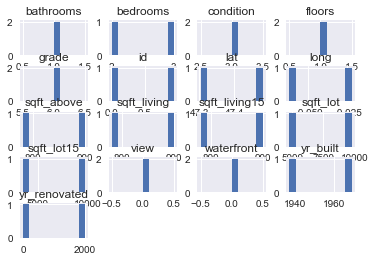

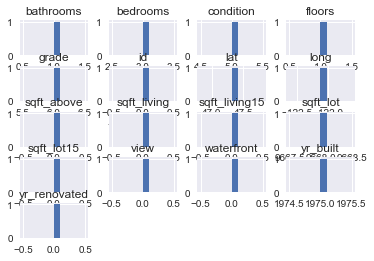

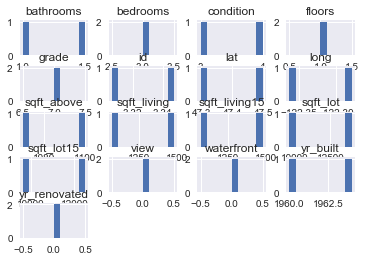

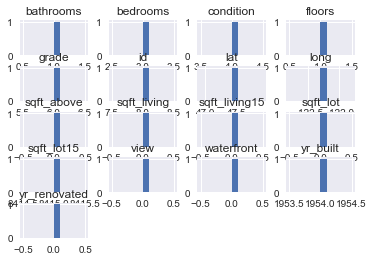

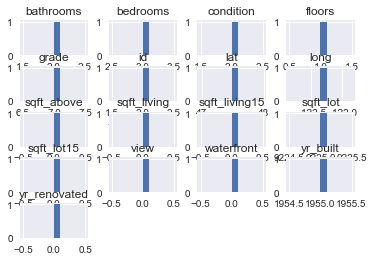

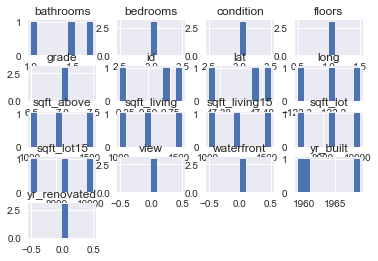

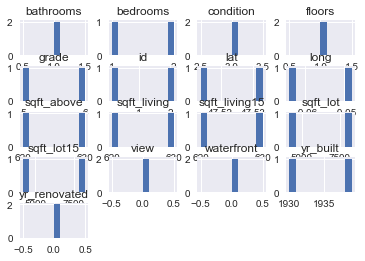

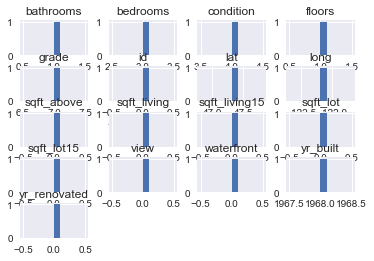

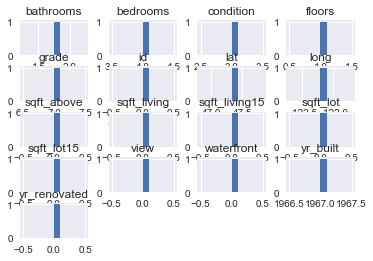

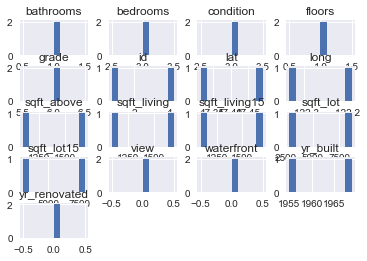

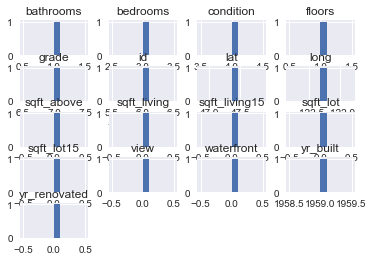

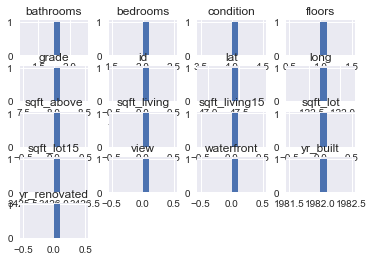

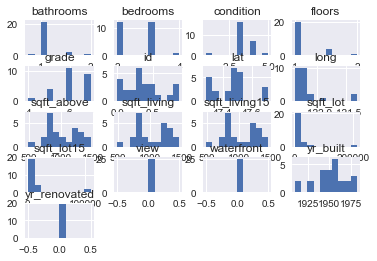

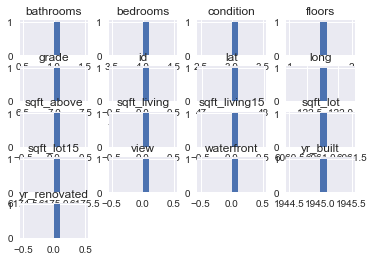

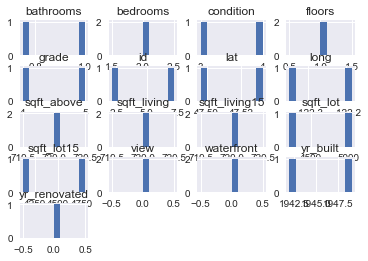

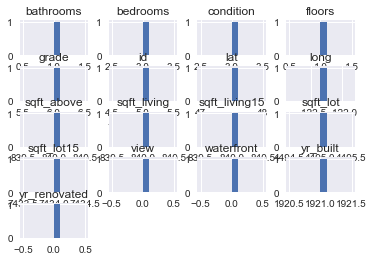

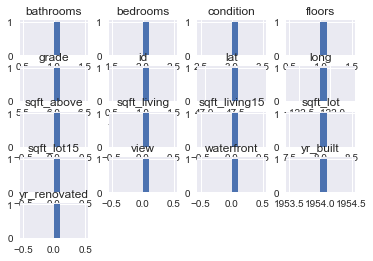

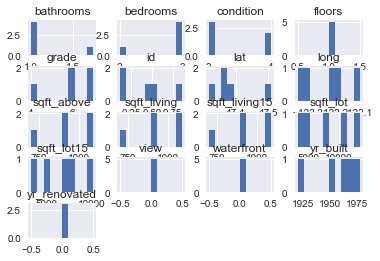

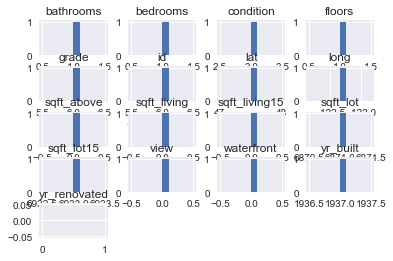

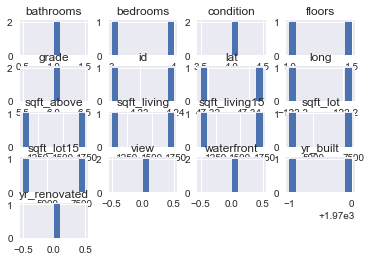

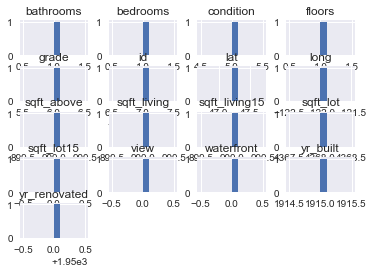

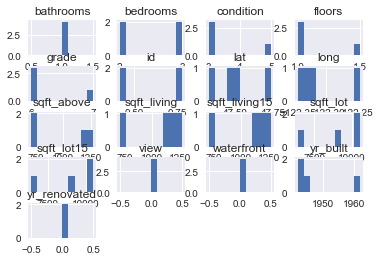

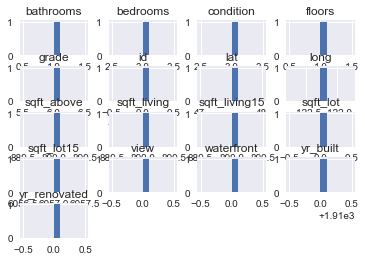

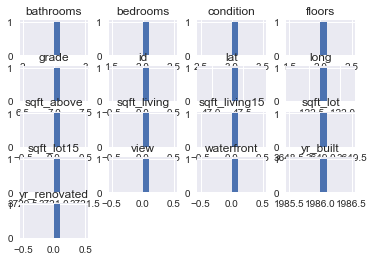

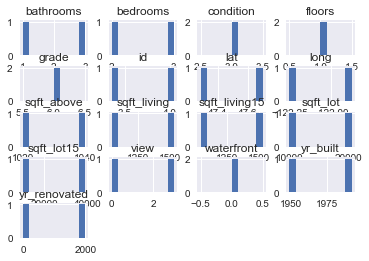

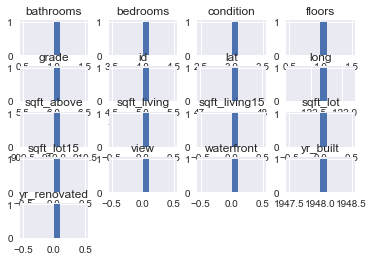

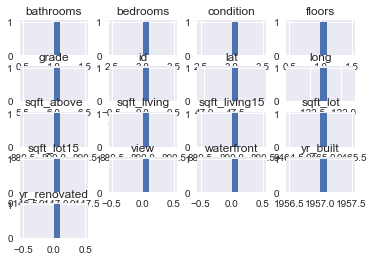

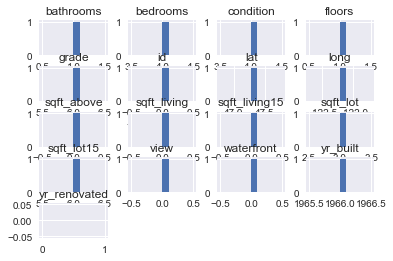

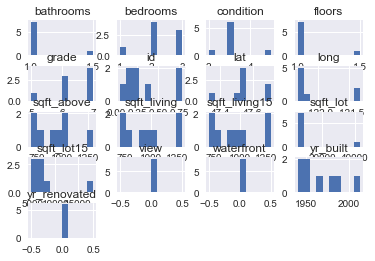

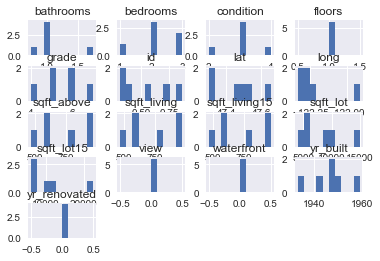

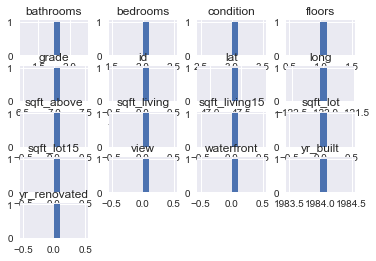

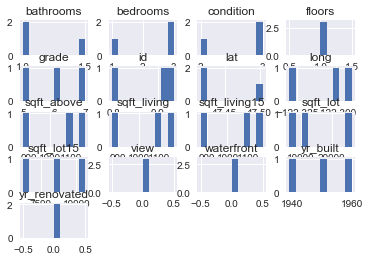

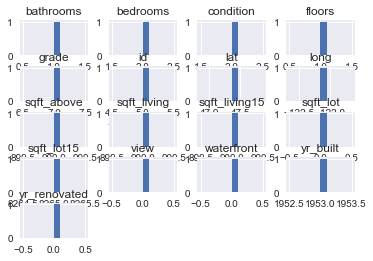

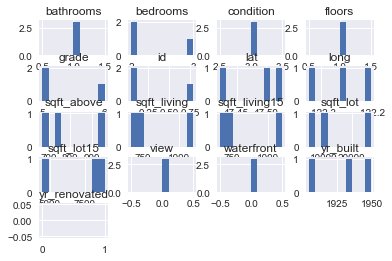

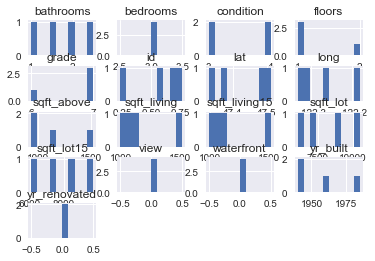

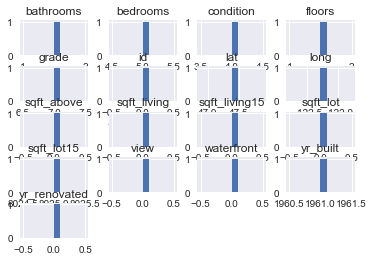

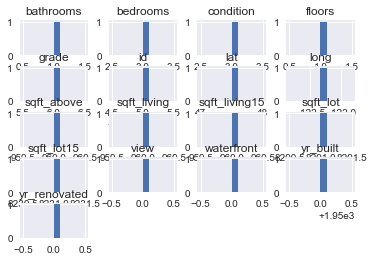

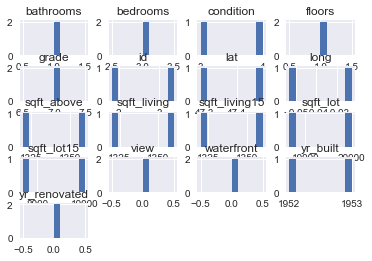

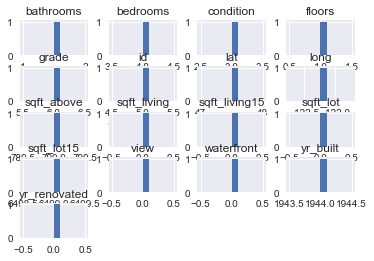

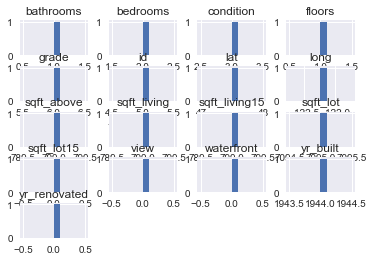

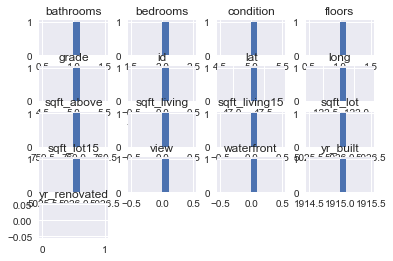

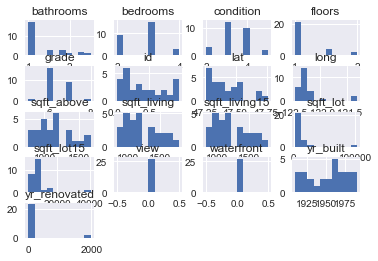

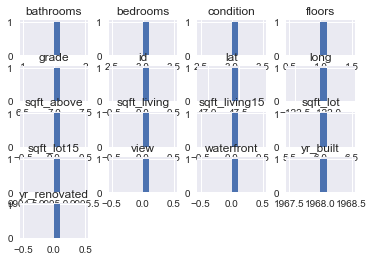

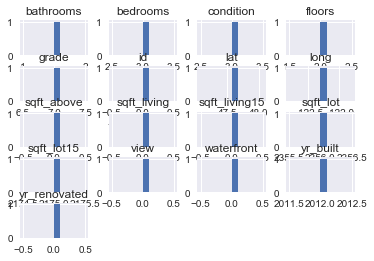

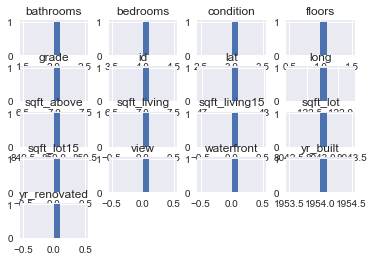

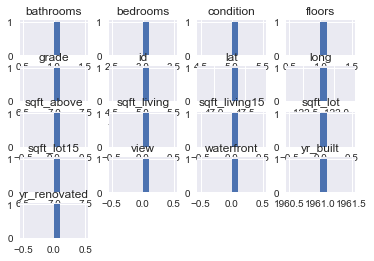

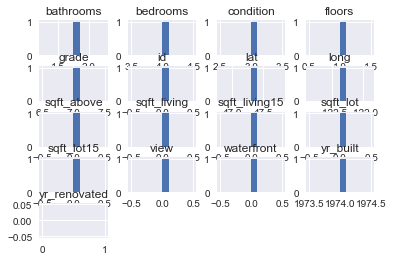

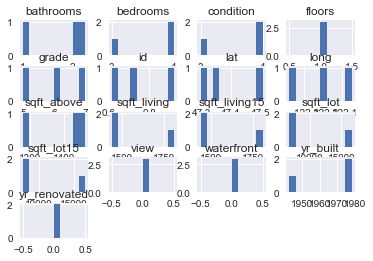

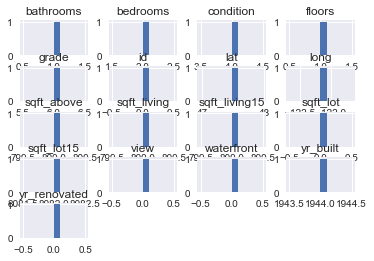

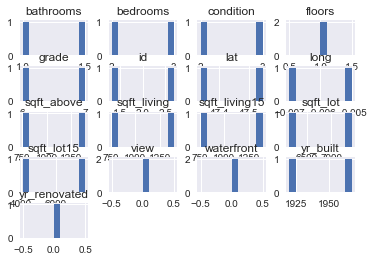

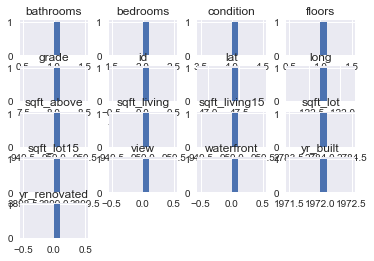

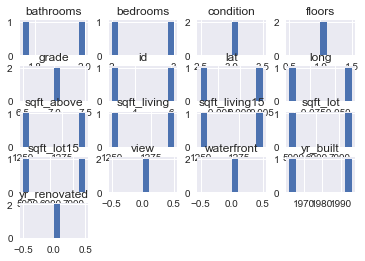

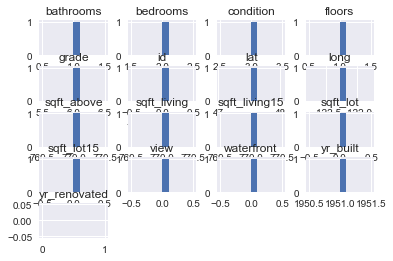

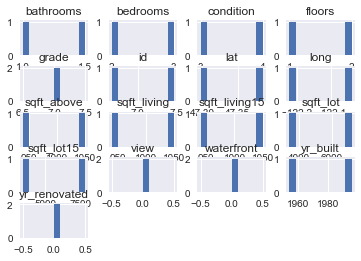

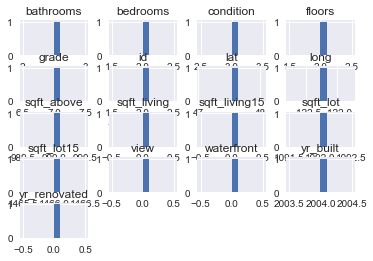

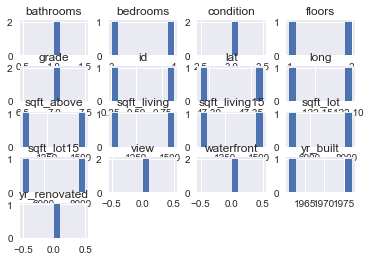

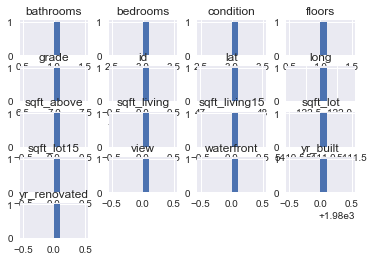

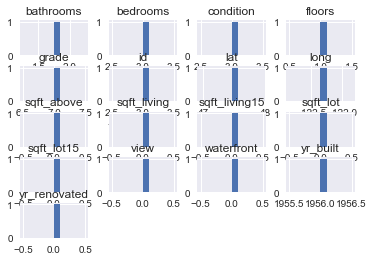

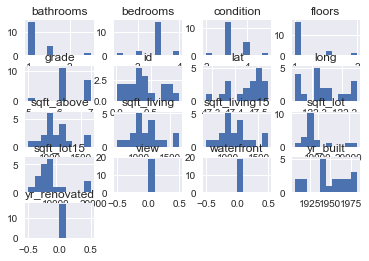

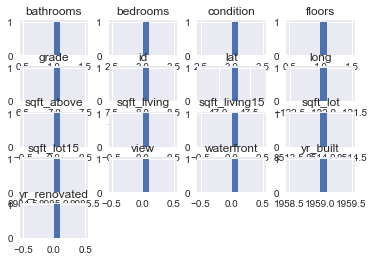

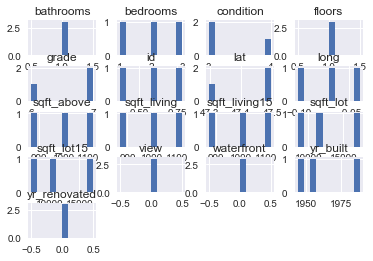

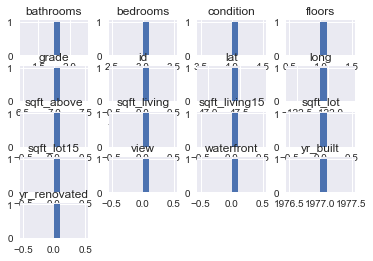

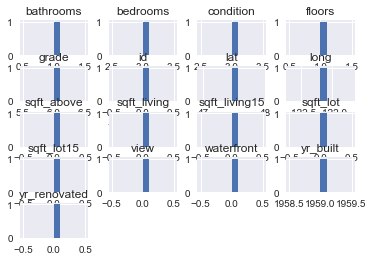

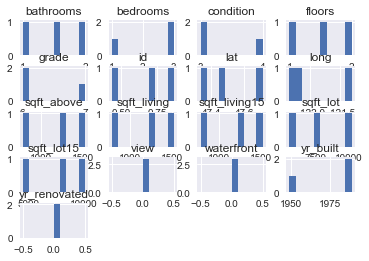

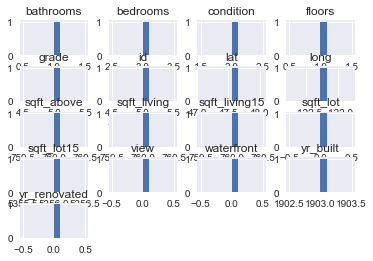

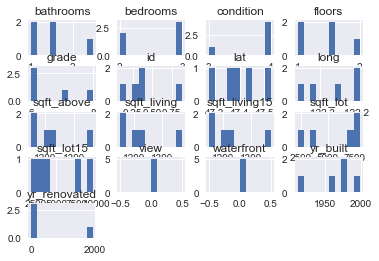

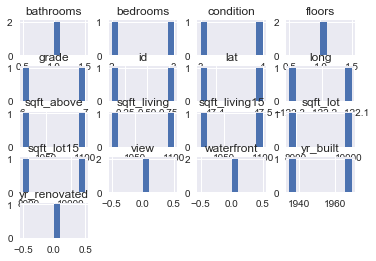

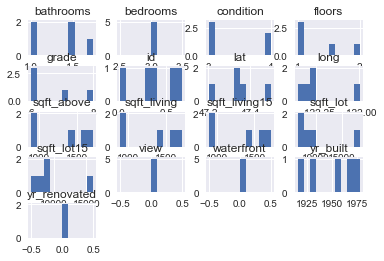

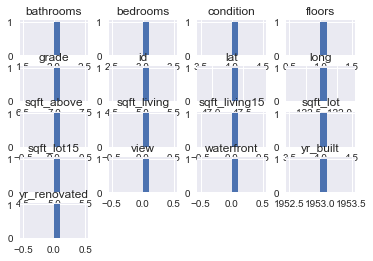

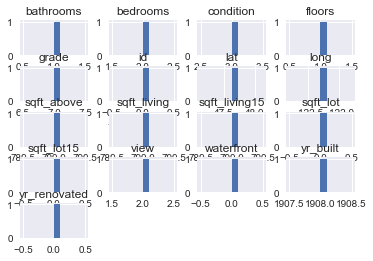

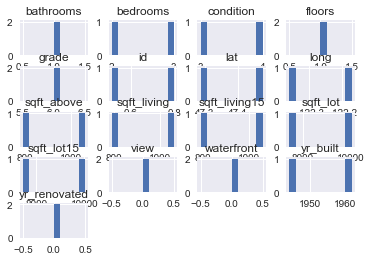

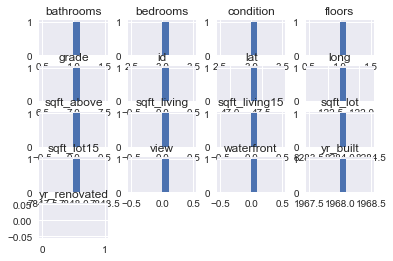

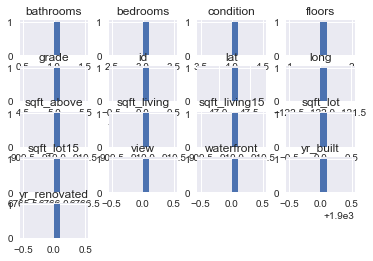

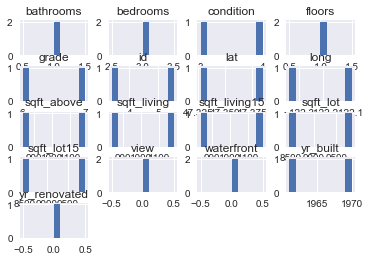

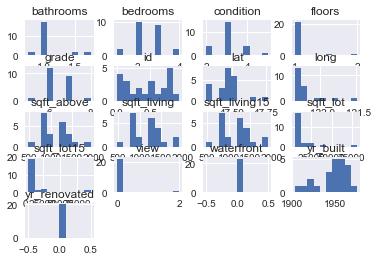

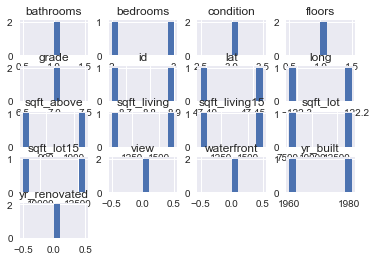

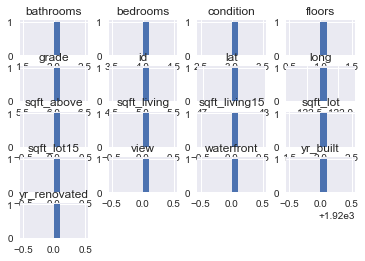

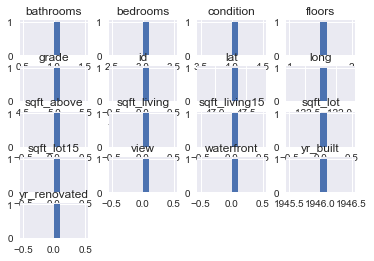

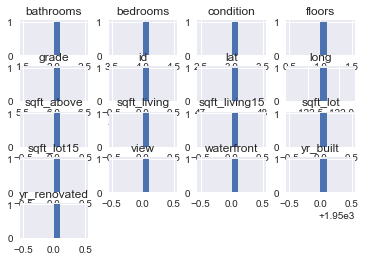

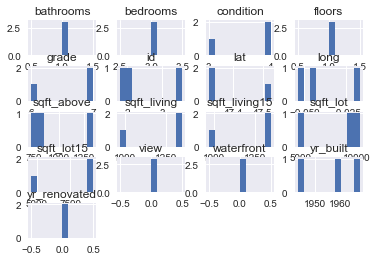

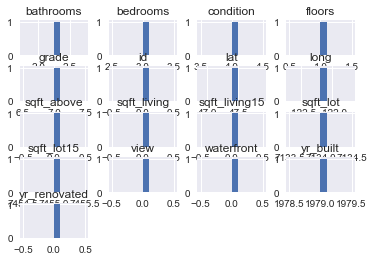

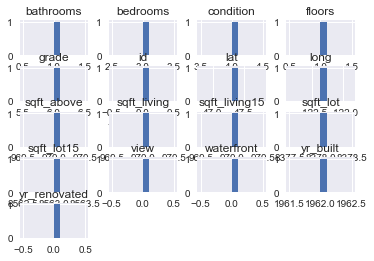

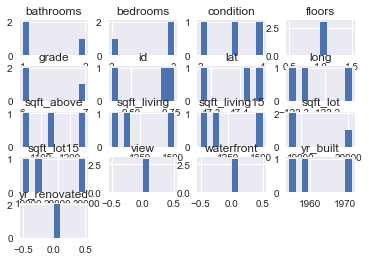

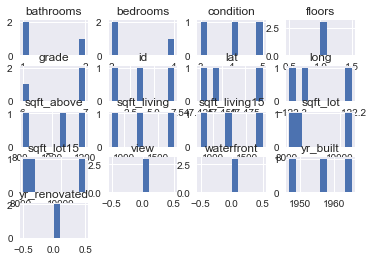

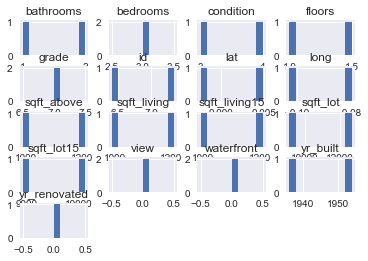

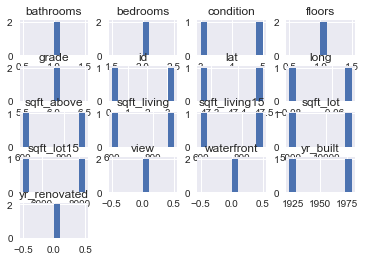

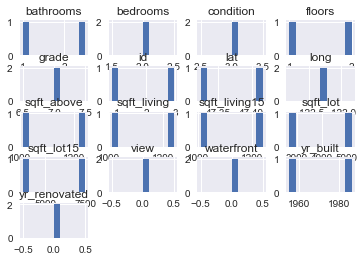

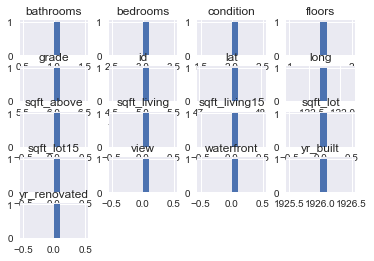

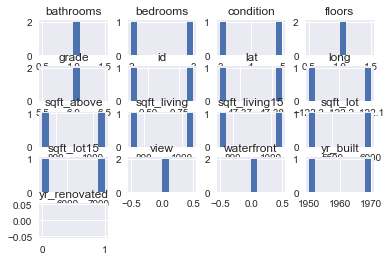

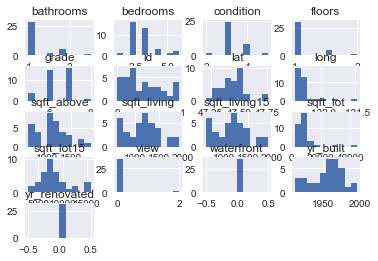

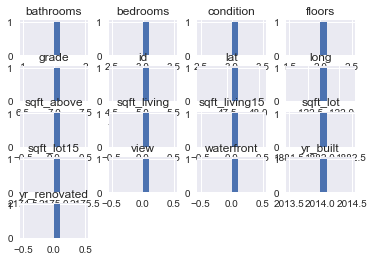

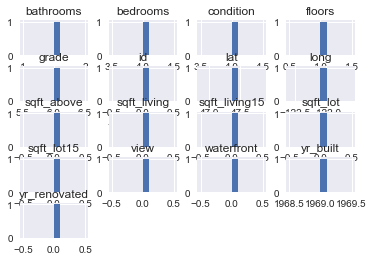

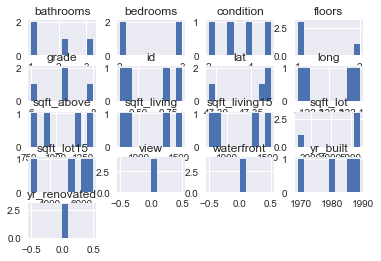

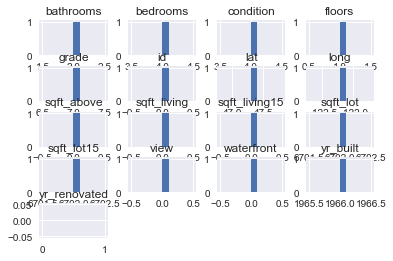

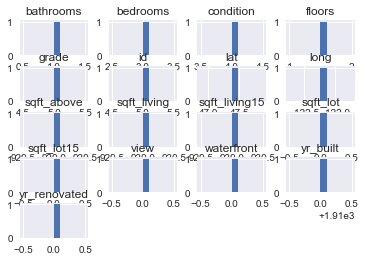

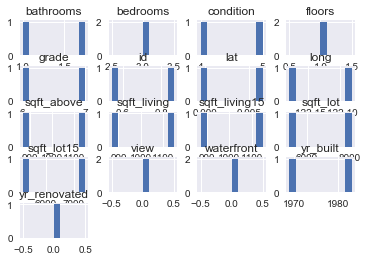

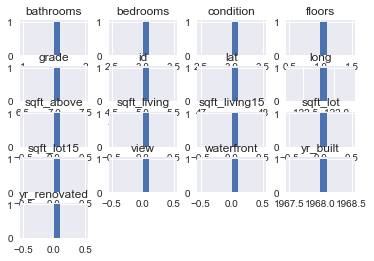

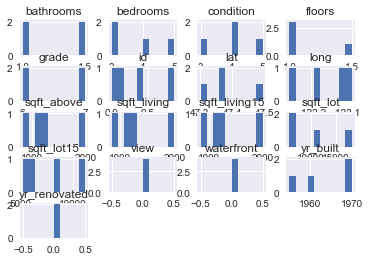

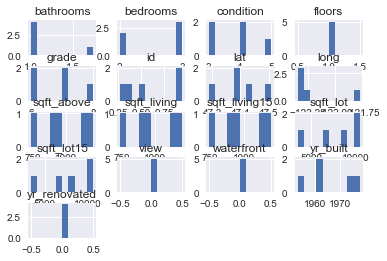

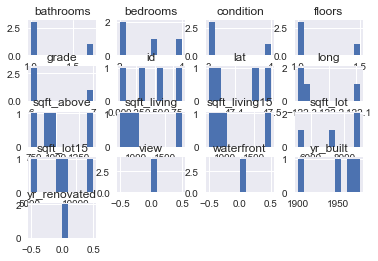

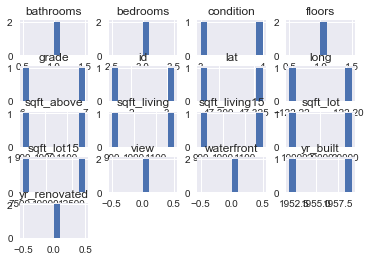

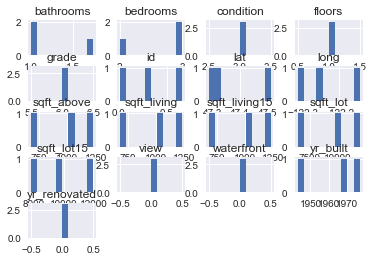

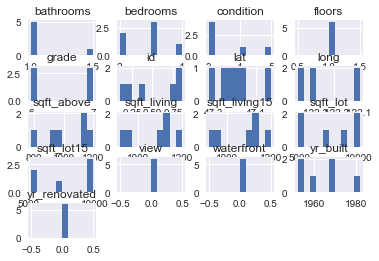

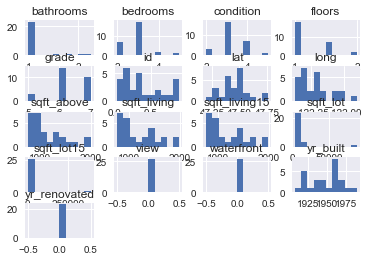

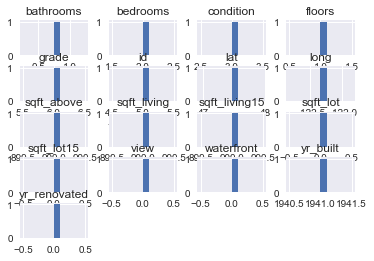

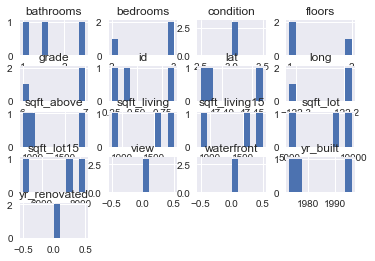

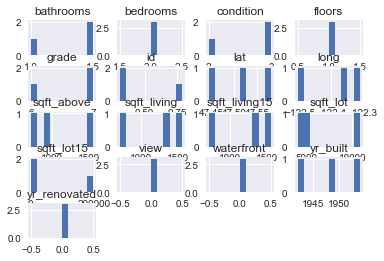

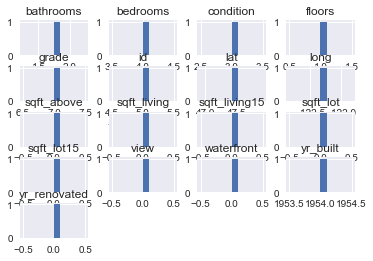

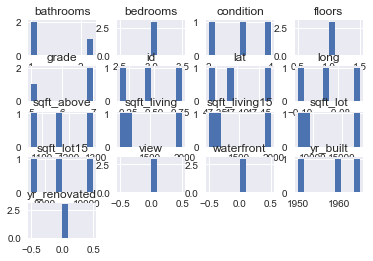

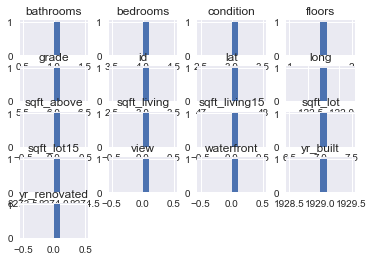

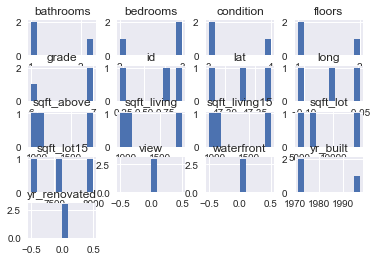

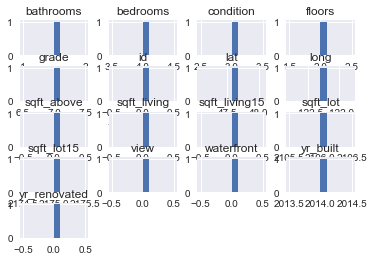

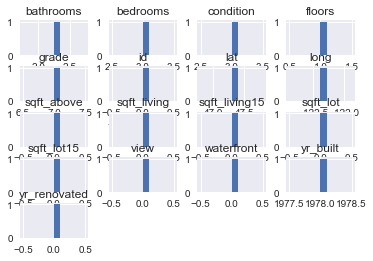

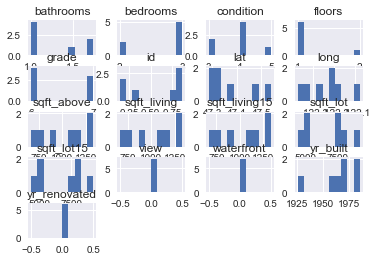

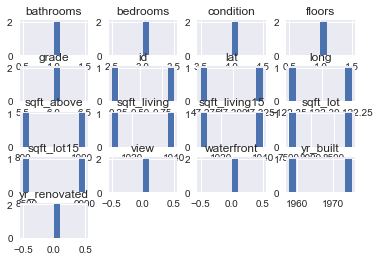

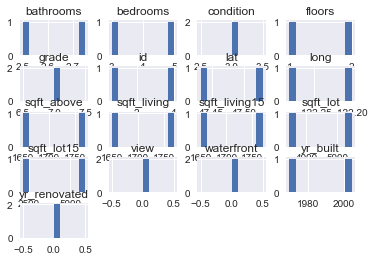

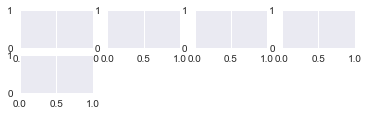

In [6]:
df.loc[df['price']<200000].groupby('price').hist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

MSE_test = []
MSE_train = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X_train, np.ravel(y_train))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X_train[selected_columns],y_train)
    yhat_train = linreg.predict(X_train[selected_columns])
    yhat_test = linreg.predict(X_test[selected_columns])
    mse_train = np.sum((y_train-yhat_train)**2)/len(y_train)
    mse_test =np.sum((y_test-yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)